## SI618 FA23 Term Project
#### Unveiling Diversity Dynamics: Exploring Racial and Gender Diversity, Fields of Study, and Alumni Outcomes in U.S. Higher Education


Authors: 

Yi-Chun Wang (`ritaycw`); section 001


Je-Ching Liao (`jeching`); section 101


Yi Hsien Wu (`yihsien`); section 101


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
dfDiversity = pd.read_csv("./data/diversity_school.csv")
dfSalary = pd.read_csv("./data/salary_potential.csv")
dfTuition = pd.read_csv("./data/tuition_cost.csv")
dfFieldOfStudy = pd.read_csv("./data/FieldOfStudyData1718_1819_PP.csv")

In [6]:
dfDiversity.head()

,name,total_enrollment,state,category,enrollment
0,University of Phoenix-Arizona,195059,Arizona,Women,134722
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959
3,University of Phoenix-Arizona,195059,Arizona,Black,31455
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984


In [7]:
dfDiversity.describe()

,total_enrollment,enrollment
count,50655.000000,50655.000000
mean,4386.690771,774.192794
std,8217.528150,2545.014538
min,1.000000,0.000000
25%,391.000000,6.000000
50%,1391.000000,59.000000
75%,4504.000000,379.000000
max,195059.000000,134722.000000


In [8]:
dfSalary.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
0,1,Auburn University,Alabama,54400,104500,51.0,31
1,2,University of Alabama in Huntsville,Alabama,57500,103900,59.0,45
2,3,The University of Alabama,Alabama,52300,97400,50.0,15
3,4,Tuskegee University,Alabama,54500,93500,61.0,30
4,5,Samford University,Alabama,48400,90500,52.0,3


In [9]:
dfTuition.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [10]:
dfFieldOfStudy.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,BBRR4_FED_COMP_N,BBRR4_FED_COMP_DFLT,BBRR4_FED_COMP_DLNQ,BBRR4_FED_COMP_FBR,BBRR4_FED_COMP_DFR,BBRR4_FED_COMP_NOPROG,BBRR4_FED_COMP_MAKEPROG,BBRR4_FED_COMP_PAIDINFULL,BBRR4_FED_COMP_DISCHARGE,DISTANCE
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor’s Degree,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor’s Degree,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor’s Degree,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,6,Doctoral Degree,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


1. Data Cleaning

In [11]:
FieldOfStudy_columns = ['UNITID', 'OPEID6', 'INSTNM',
                        'CONTROL', 'CIPCODE', 'CIPDESC',
                        'CREDLEV', 'CREDDESC']
dfFieldOfStudy = dfFieldOfStudy.loc[:, FieldOfStudy_columns]
dfFieldOfStudy.head()

,UNITID,OPEID6,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC
0,100654.0,1002,Alabama A & M University,Public,100,"Agriculture, General.",3,Bachelor’s Degree
1,100654.0,1002,Alabama A & M University,Public,109,Animal Sciences.,3,Bachelor’s Degree
2,100654.0,1002,Alabama A & M University,Public,110,Food Science and Technology.,3,Bachelor’s Degree
3,100654.0,1002,Alabama A & M University,Public,110,Food Science and Technology.,5,Master's Degree
4,100654.0,1002,Alabama A & M University,Public,110,Food Science and Technology.,6,Doctoral Degree


In [12]:
dfFieldOfStudy.describe()

,UNITID,OPEID6,CIPCODE,CREDLEV
count,218824.000000,228760.000000,228760.000000,228760.000000
mean,204825.622994,6821.502308,3340.468268,3.225061
std,89463.419483,9144.601852,1710.830925,1.872395
min,100654.000000,1002.000000,100.000000,1.000000
25%,150136.000000,2062.000000,1445.000000,2.000000
50%,188438.000000,3210.000000,4005.000000,3.000000
75%,222567.000000,6842.000000,5107.000000,5.000000
max,494904.000000,42934.000000,6127.000000,8.000000


In [13]:
dfSalary[dfSalary['make_world_better_percent'].isna()]

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent
23,24,Amridge University,Alabama,35700,65900,NaN,0
32,5,Arizona Christian University,Arizona,42600,76600,NaN,7
52,18,Central Baptist College,Arkansas,36900,68000,NaN,3
53,19,Philander Smith College,Arkansas,34600,61200,NaN,26
58,5,Charles R Drew University of Medicine and Science,California,78300,135700,NaN,3
97,19,Nazarene Bible College,Colorado,33600,60100,NaN,0
113,16,St Vincent's College,Connecticut,46800,87900,NaN,0
195,10,St. John's College-Department of Nursing,Illinois,55100,100000,NaN,0
207,22,Saint Francis Medical Center College of Nursing,Illinois,52800,90800,NaN,0
208,23,Methodist College,Illinois,51400,90500,NaN,0


1) Diversity_school.csv:
The top 10 states with the highest percentage of women enrollment.

Bar Plot

In [14]:
enrollmentRate = dfDiversity['enrollment']/dfDiversity['total_enrollment']
dfDiversity['enrollment_rate'] = enrollmentRate

In [15]:
dfW = dfDiversity[dfDiversity['category'] == 'Women']
dfWomenRate = dfW[['state', 'enrollment_rate']].groupby('state')
dfWomenRate = dfWomenRate.mean().reset_index()
dfWomenRate.columns = ['state', 'women_rate']
dfWomenRate.head()

,state,women_rate
0,Alabama,0.582997
1,Alaska,0.596630
2,Arizona,0.574896
3,Arkansas,0.598022
4,California,0.573326


In [16]:
dfWomenRate = dfWomenRate.sort_values(by='women_rate', ascending=False)

In [17]:
dfWomenRate.reset_index(inplace=True, drop=True)

In [18]:
dfWomenRate.head(10)

,state,women_rate
0,Virginia,0.660170
1,Nebraska,0.643474
2,Mississippi,0.630666
3,Kentucky,0.628941
4,Louisiana,0.626407
5,Ohio,0.622125
6,Florida,0.614742
7,Idaho,0.614416
8,Wisconsin,0.612508
9,Georgia,0.607820


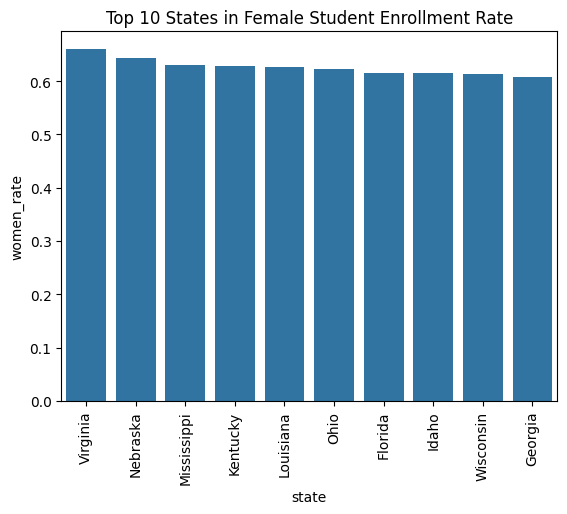

In [19]:
sns.barplot(data=dfWomenRate.head(10), y='women_rate', x='state')

plt.title("Top 10 States in Female Student Enrollment Rate")
plt.xticks(rotation=90)
plt.show()

Among the top 10 states with the highest percentage of women enrollment, namely Virginia, Nebraska, Mississippi, Kentucky, Louisiana, Ohio, Florida, Idaho, Wisconsin, and Georgia, each state boasts a female enrollment rate surpassing 50%. Interestingly, except Idaho, most of these states are geographically situated in the eastern part of the US. Further exploration and analysis could provide valuable insights into the factors driving this regional disparity in women's participation in higher education.

2) Diversity_school.csv:
The top 10 states with the highest percentage of enrollment from different racial groups.

In [20]:
dfDiversity2 = dfDiversity.copy()

In [21]:
statesDict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

For the sake of visualization (simplicity of axis labeling) abbreviation of the state names are added to the dataset.

In [22]:
dfStatesAbbr = pd.DataFrame.from_dict(statesDict, orient='index').reset_index()
dfStatesAbbr.columns = ['State_abbreviation', 'Full_name']
dfStatesAbbr.head()

,State_abbreviation,Full_name
0,AK,Alaska
1,AL,Alabama
2,AR,Arkansas
3,AZ,Arizona
4,CA,California


In [23]:
dfDiversity2 = dfDiversity2.merge(dfStatesAbbr, 
                                  left_on='state',
                                  right_on='Full_name')
dfDiversity2 = dfDiversity2.drop(labels='Full_name', axis=1)
dfDiversity2.head()

,name,total_enrollment,state,category,enrollment,enrollment_rate,State_abbreviation
0,University of Phoenix-Arizona,195059,Arizona,Women,134722,0.690673,AZ
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876,0.004491,AZ
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959,0.010043,AZ
3,University of Phoenix-Arizona,195059,Arizona,Black,31455,0.161259,AZ
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984,0.071691,AZ


In [24]:
dfRaceRate = dfDiversity2[~((dfDiversity2['category'] == 'Non-Resident Foreign') 
                            | (dfDiversity2['category'] =='Women'))]
for cat in dfRaceRate['category'].unique():
    print(cat)
    dfRaceEnrollment = dfRaceRate.loc[dfRaceRate['category'] == cat].groupby(
        ['State_abbreviation'])['enrollment_rate']
    print(dfRaceEnrollment.mean().sort_values(ascending=False).head(10))

American Indian / Alaska Native
State_abbreviation
MT    0.307692
ND    0.232772
AK    0.224774
NM    0.140488
SD    0.138159
OK    0.102377
AZ    0.074430
NE    0.049232
MI    0.027247
MN    0.025920
Name: enrollment_rate, dtype: float64
Asian
State_abbreviation
HI    0.252253
CA    0.117521
NV    0.089344
WA    0.061857
NY    0.055113
MA    0.051038
NJ    0.049569
MN    0.045627
AK    0.044895
OR    0.041869
Name: enrollment_rate, dtype: float64
Black
State_abbreviation
MS    0.486392
GA    0.433147
LA    0.415272
AL    0.409416
SC    0.374009
VA    0.347346
MD    0.327352
NC    0.311468
TN    0.271242
DE    0.265733
Name: enrollment_rate, dtype: float64
Hispanic
State_abbreviation
NM    0.376736
TX    0.314417
CA    0.303098
FL    0.239566
AZ    0.236692
NV    0.196266
NJ    0.164690
CO    0.158567
CT    0.125519
IL    0.125079
Name: enrollment_rate, dtype: float64
Native Hawaiian / Pacific Islander
State_abbreviation
HI    0.126925
NV    0.017215
AK    0.014255
OR    0.008499
CA   

In [25]:
raceSubplotTitle = ['American Native', 'Asian', 'Black', 
                    'Hispanic', 'Pacific Islander', 'White', 
                    'Two or More Races', 'Unknown', 'Total Minority']

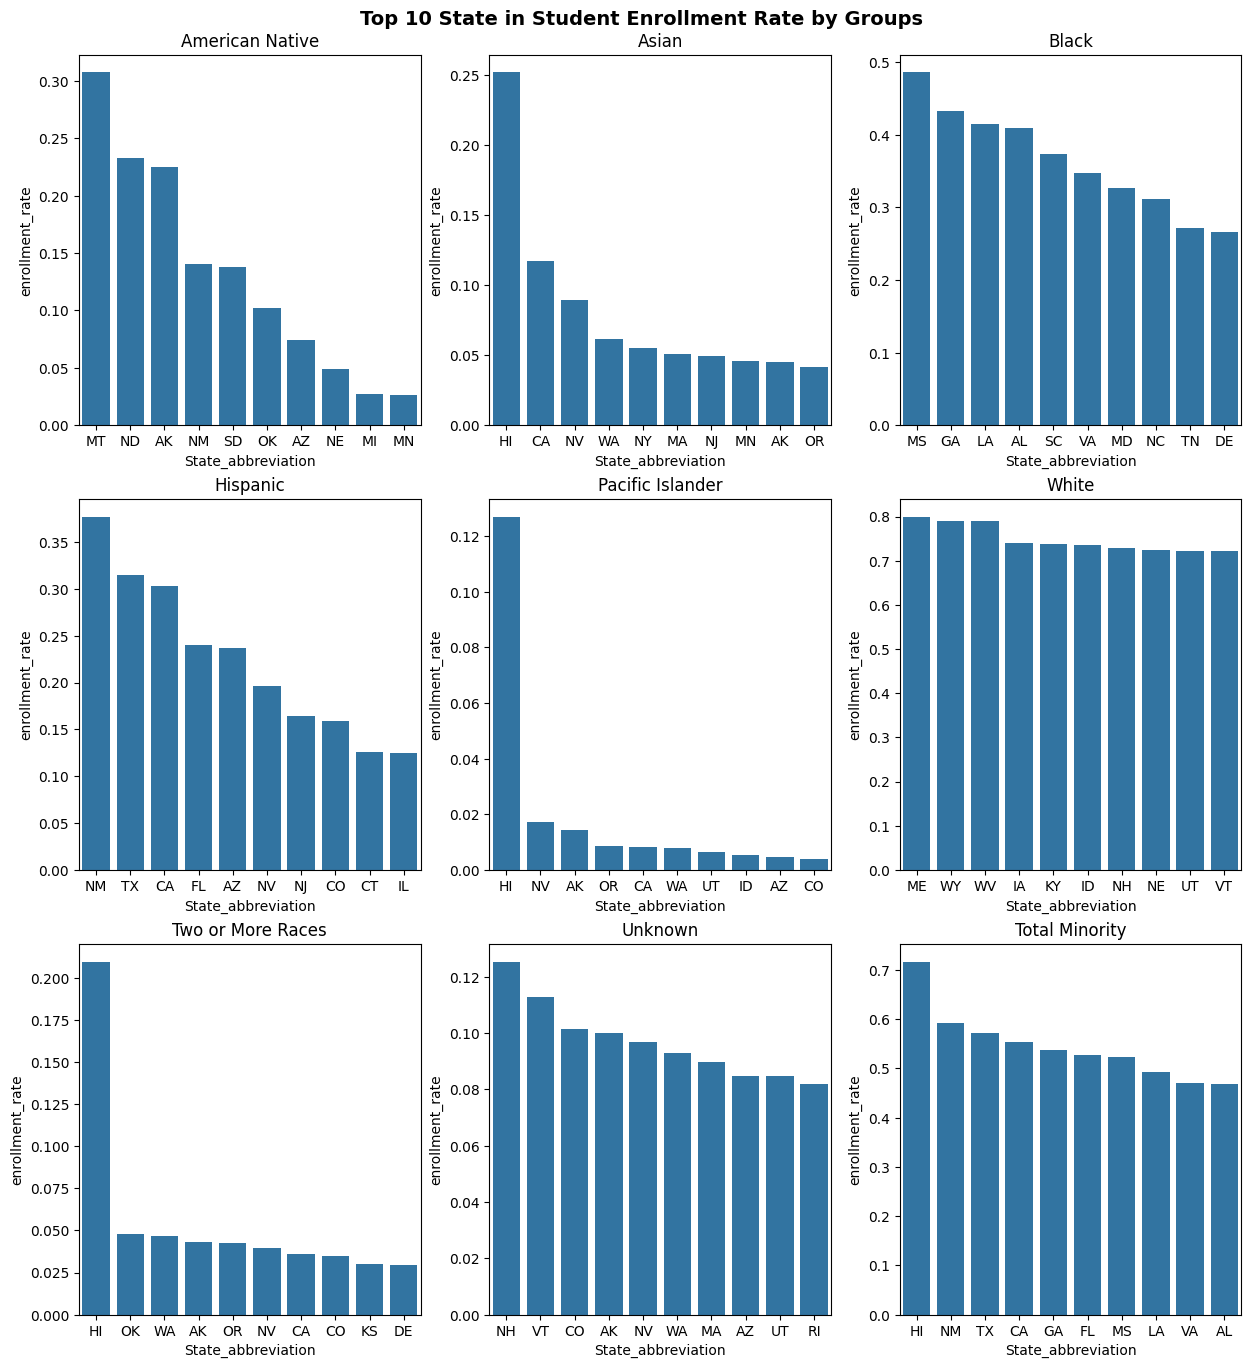

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, ax in zip(range(9), axes.flat):
    cat = dfRaceRate['category'].unique()[i]
    dfRateMean =dfRaceRate.loc[dfRaceRate['category'] == cat].groupby(
        ['State_abbreviation'])['enrollment_rate'].mean()
    sns.barplot(data=dfRateMean.sort_values(ascending=False).head(10), ax=ax)
    ax.set_title(raceSubplotTitle[i])

plt.suptitle(("Top 10 State in Student Enrollment Rate by Groups"),
               fontsize=14, fontweight='bold')

plt.subplots_adjust(top=0.95)

plt.show()

From the subplots, we observe interesting trends in enrollment rate for different group of races. For the enrollment rate for American native students, the highest state is Montana (~30%), with North Dakota and Alaska following, and then come New Mexico and South Dakota. This trend coincides with the proximity of the location of the states to the native American population. For the enrollment rate for Asian students, we see an extremely high rate for the state of Hawaii(~25%), reasonably due to its proximity to Asia and its history with Asian settlers. Following Hawaii, west-coast states such as California, Nevada, and Washington are all high with Asian student enrollment rate. For the enrollment rate for African American native students, the top 10 states are all part of the historical Southern United States, scoring between 25% to 50%. For the enrollment rate for Hispanic students, those states with connections with the previous Spanish colonization and Mexico are in the top 10 states list, notably in the top 5. For the enrollment rate for Pacific Islanders, it is not surprising that Hawaii scores way ahead. For the enrollment rate for White students, the top 10 states are mostly in the northern part of the country, with similar rates between 70% to 80%. For the enrollment rate for students with two or more races, Hawaii again scores way ahead, owing to the diversity of the people living there. Finally, we examine the total trend for Minority, with Hawaii coming in first, the following states are mostly states with a large population of Hispanic or African American students.

3) Diversity_school.csv:
What is the distribution of the Diversity Index for all institutions? Reference: How to calculate Simpson's Diversity Index (AP Biology)

Ds = 1 - Σ(n/N)^2

Histogram

In [27]:
stanford = dfDiversity[dfDiversity['name'] == 'Stanford University']
stanfordEthnicity = stanford[~((dfDiversity['category'] =='Women') | 
                               (dfDiversity['category'] =='Total Minority'))]
stanfordEthnicity['enrollment_rate'].sum()

C:\Users\User\AppData\Local\Temp\ipykernel_5396\1540971567.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stanfordEthnicity = stanford[~((dfDiversity['category'] =='Women') |


1.0

From this example we can be sure that the enrollment rates besides that of women and total minority sum up to one.

In [28]:
dfDiversity['rate_squared'] = (dfDiversity['enrollment_rate'])**2

In [29]:
dfRace = dfDiversity.copy()

In [30]:
dfRace = dfRace[~((dfDiversity['category'] =='Women') | 
                  (dfDiversity['category'] =='Total Minority'))]

In [31]:
dfRace.head()

,name,total_enrollment,state,category,enrollment,enrollment_rate,rate_squared
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876,0.004491,0.000020
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959,0.010043,0.000101
3,University of Phoenix-Arizona,195059,Arizona,Black,31455,0.161259,0.026004
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984,0.071691,0.005140
5,University of Phoenix-Arizona,195059,Arizona,Native Hawaiian / Pacific Islander,1019,0.005224,0.000027


In [32]:
# Group by institution and sum the squared values
dfRateSqSum = dfRace.groupby('name')['rate_squared'].sum()
dfInstitutionDiversity = dfRateSqSum.to_frame(name='rate_squared_sum')
dfInstitutionDiversity

,rate_squared_sum
name,
A.T. Still University of Health Sciences,0.408318
AIB College of Business,0.379891
AOMA Graduate School of Integrative Medicine,0.518690
ASA Institute of Business and Computer Technology,0.285844
ATA Career Education,0.378971
...,...
Youngstown State University,0.590584
Yuba College,0.296689
Zane State College,0.646188


In [33]:
diversityIndex = 1 - dfInstitutionDiversity['rate_squared_sum']
dfInstitutionDiversity['diversity_index'] = diversityIndex

In [34]:
dfInstitutionDiversity['diversity_index'].describe()

count    4574.000000
mean        0.505708
std         0.181167
min         0.000000
25%         0.388870
50%         0.535467
75%         0.646473
max         0.832800
Name: diversity_index, dtype: float64

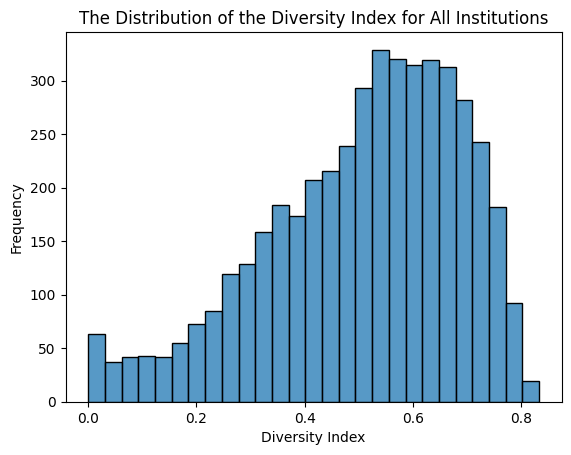

In [35]:
sns.histplot(data=dfInstitutionDiversity, x='diversity_index')
plt.title('The Distribution of the Diversity Index for All Institutions')
plt.xlabel('Diversity Index')
plt.ylabel('Frequency')
plt.show()

In [36]:
dfDiversity = pd.merge(dfDiversity, dfInstitutionDiversity, on='name')

In [37]:
dfDiversity.head()

,name,total_enrollment,state,category,enrollment,enrollment_rate,rate_squared,rate_squared_sum,diversity_index
0,University of Phoenix-Arizona,195059,Arizona,Women,134722,0.690673,0.477029,0.24177,0.75823
1,University of Phoenix-Arizona,195059,Arizona,American Indian / Alaska Native,876,0.004491,0.000020,0.24177,0.75823
2,University of Phoenix-Arizona,195059,Arizona,Asian,1959,0.010043,0.000101,0.24177,0.75823
3,University of Phoenix-Arizona,195059,Arizona,Black,31455,0.161259,0.026004,0.24177,0.75823
4,University of Phoenix-Arizona,195059,Arizona,Hispanic,13984,0.071691,0.005140,0.24177,0.75823


The distribution of the Diversity Index for all institutions is left-skewed, attaining its highest point at 0.6. This implies that a notable proportion of institutions possess diversity scores below this peak. The overall range of Diversity Index values spans from 0.0 to 0.85.

4) Tuition_cost.csv:
What are the differences between in-state and out-of-state tuition fees across states?

In [38]:
dfTuition.head()

,name,state,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total
0,Aaniiih Nakoda College,Montana,MT,Public,2 Year,NaN,2380,2380,2380,2380
1,Abilene Christian University,Texas,TX,Private,4 Year,10350.0,34850,45200,34850,45200
2,Abraham Baldwin Agricultural College,Georgia,GA,Public,2 Year,8474.0,4128,12602,12550,21024
3,Academy College,Minnesota,MN,For Profit,2 Year,NaN,17661,17661,17661,17661
4,Academy of Art University,California,CA,For Profit,4 Year,16648.0,27810,44458,27810,44458


In [39]:
ser_diff = dfTuition['out_of_state_tuition'] - dfTuition['in_state_tuition']
dfTuition['diff_in_out_state_tuition'] = ser_diff
tuition_diff = dfTuition.groupby('state')['diff_in_out_state_tuition']
tuition_diff = tuition_diff.mean().sort_values(ascending=False).reset_index()
tuition_diff.columns = ['state', 'tuition_difference']
tuition_diff

,state,tuition_difference
0,Colorado,8637.842105
1,Alaska,7442.000000
2,Utah,6871.071429
3,Nevada,6811.400000
4,Hawaii,6648.000000
5,Kentucky,6571.318182
6,Idaho,6221.692308
7,Maryland,5866.688889
8,Arizona,5649.294118
9,Delaware,5538.888889


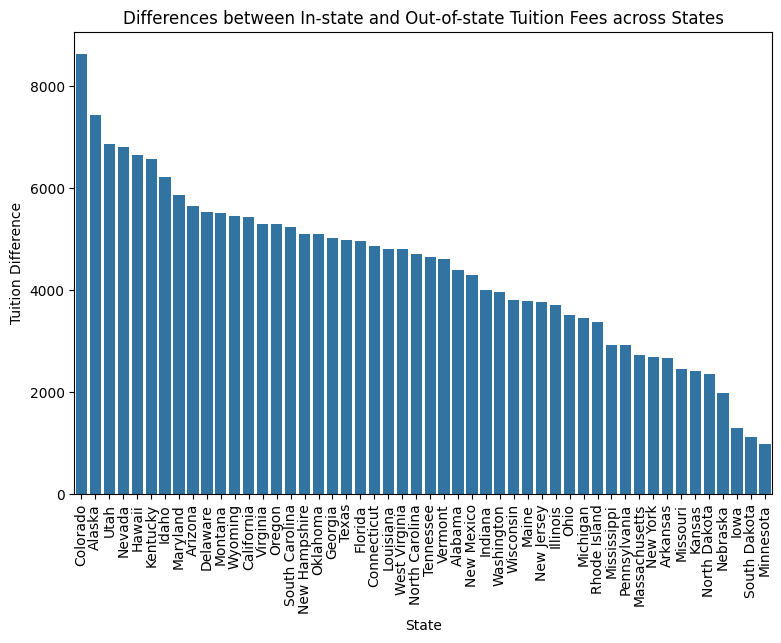

In [40]:
plt.figure(figsize=(9,6))

sns.barplot(data=tuition_diff, y='tuition_difference', x='state')

plt.title('Differences between In-state and Out-of-state Tuition Fees across \
States')
plt.xlabel('State')
plt.ylabel('Tuition Difference')
plt.xticks(rotation=90)

plt.show()

Among all the US states, institutions in Colorado have the largest difference between their in-state and out-of-state tuition fees, which is more than $8000 on average. This substantial disparity in tuition fees highlights the financial challenge for non-residential students to pursue higher education in Colorado. In contrast, the states of Iowa, South Dakota, and Minnesota have the smallest gaps between in-state and out-of-state tuition fees, averaging less than $1000. This suggests a more accessible and equitable educational environment for students from outside of these states, potentially fostering a more diverse student population.

5) Join diversity_school.csv and tuition_cost.csv:
How does the amount of tuition fees affect racial diversity indices in institutions?

Scatter Plot


In [41]:
df_Diversity_Tuition = pd.merge(dfDiversity, dfTuition, on='name', how='inner')
df_Diversity_Tuition.drop(labels=['state_y'], axis=1, inplace=True)
df_Diversity_Tuition.rename(columns={'state_x': 'state'}, inplace=True)
df_Diversity_Tuition

,name,total_enrollment,state,category,enrollment,enrollment_rate,rate_squared,rate_squared_sum,diversity_index,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,diff_in_out_state_tuition
0,Liberty University,81459,Virginia,Women,48329,0.593292,0.351996,0.337990,0.662010,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
1,Liberty University,81459,Virginia,American Indian / Alaska Native,447,0.005487,0.000030,0.337990,0.662010,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
2,Liberty University,81459,Virginia,Asian,856,0.010508,0.000110,0.337990,0.662010,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
3,Liberty University,81459,Virginia,Black,14751,0.181085,0.032792,0.337990,0.662010,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
4,Liberty University,81459,Virginia,Hispanic,1186,0.014559,0.000212,0.337990,0.662010,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23744,Myotherapy Institute,15,Nebraska,White,13,0.866667,0.751111,0.768889,0.231111,NE,For Profit,2 Year,NaN,11225,11225,11225,11225,0
23745,Myotherapy Institute,15,Nebraska,Two Or More Races,0,0.000000,0.000000,0.768889,0.231111,NE,For Profit,2 Year,NaN,11225,11225,11225,11225,0
23746,Myotherapy Institute,15,Nebraska,Unknown,0,0.000000,0.000000,0.768889,0.231111,NE,For Profit,2 Year,NaN,11225,11225,11225,11225,0
23747,Myotherapy Institute,15,Nebraska,Non-Resident Foreign,0,0.000000,0.000000,0.768889,0.231111,NE,For Profit,2 Year,NaN,11225,11225,11225,11225,0


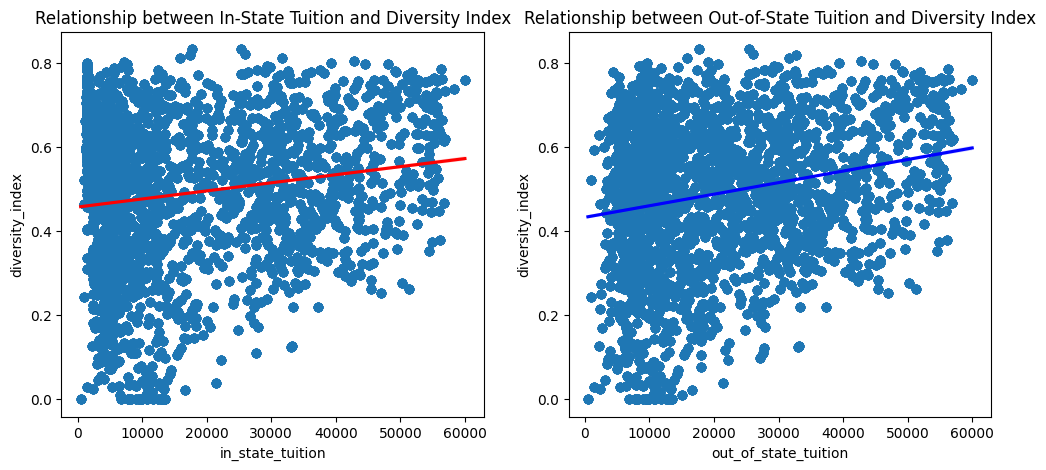

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First regplot
sns.regplot(x='in_state_tuition',
            y='diversity_index',
            data=df_Diversity_Tuition,
            ax=axes[0],
            line_kws={'color':'red'})
axes[0].set_title('Relationship between In-State Tuition and Diversity Index')

# Second regplot
sns.regplot(x='out_of_state_tuition',
            y='diversity_index',
            data=df_Diversity_Tuition,
            ax=axes[1],
            line_kws={'color':'blue'})
axes[1].set_title('Relationship between Out-of-State Tuition and Diversity \
Index')

plt.show()

In [43]:
mdlDiversityTuition_instate = smf.ols('diversity_index ~ in_state_tuition',
                                      data=df_Diversity_Tuition).fit()
mdlDiversityTuition_instate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     680.1
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          7.70e-148
Time:                        23:31:32   Log-Likelihood:                 7609.6
No. Observations:               23749   AIC:                        -1.522e+04
Df Residuals:                   23747   BIC:                        -1.520e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4569      0.002    269.325      0.000       0.454       0.460
in_state_tuition  1.923e-06   7.37e-08     26.079      0.000    1.78e-06    2.07e-06
==============================================================================
Omnibus:                     1000.141   Durbin-Watson:                   0.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1075.691
Skew:                          -0.502   Prob(JB):                    2.61e-234
Kurtosis:                       2.717   Cond. No.                     3.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
mdlDiversityTuition_outstate = smf.ols('diversity_index ~ out_of_state_tuition',
                                       data=df_Diversity_Tuition).fit()
mdlDiversityTuition_outstate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     1117.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          2.71e-239
Time:                        23:31:32   Log-Likelihood:                 7820.0
No. Observations:               23749   AIC:                        -1.564e+04
Df Residuals:                   23747   BIC:                        -1.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4325      0.002    210.836      0.000       0.428       0.437
out_of_state_tuition  2.751e-06   8.23e-08     33.417      0.000    2.59e-06    2.91e-06
==============================================================================
Omnibus:                      954.685   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              953.579
Skew:                          -0.454   Prob(JB):                    8.57e-208
Kurtosis:                       2.627   Cond. No.                     4.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The two presented scatterplots indicate positive correlations between both in-state and out-of-state tuition fees and the institution's diversity index, meaning that institutions with higher tuition fees are more likely to have higher diversity indices. Further regression analysis we conducted shows that both positive relationships are statistically significant, with both p-values lower than 0.05. We speculate that the positive correlation between tuition fees and diversity indices derives from higher-cost institutions offering better educational resources, which attracts a more diverse student population seeking enhanced educational opportunities.

6) Join diversity_school.csv and tuition_cost.csv:
What is the relationship between the types (public/private/for-profit) of institutions and the enrollment percentage of women and the total minority?

Analysis: ANOVA test

Box Plot(gender)

Violin Plot(total minority)

In [45]:
df_Diversity_Tuition.head()

,name,total_enrollment,state,category,enrollment,enrollment_rate,rate_squared,rate_squared_sum,diversity_index,state_code,type,degree_length,room_and_board,in_state_tuition,in_state_total,out_of_state_tuition,out_of_state_total,diff_in_out_state_tuition
0,Liberty University,81459,Virginia,Women,48329,0.593292,0.351996,0.33799,0.66201,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
1,Liberty University,81459,Virginia,American Indian / Alaska Native,447,0.005487,0.000030,0.33799,0.66201,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
2,Liberty University,81459,Virginia,Asian,856,0.010508,0.000110,0.33799,0.66201,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
3,Liberty University,81459,Virginia,Black,14751,0.181085,0.032792,0.33799,0.66201,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0
4,Liberty University,81459,Virginia,Hispanic,1186,0.014559,0.000212,0.33799,0.66201,VA,Private,4 Year,10478.0,25276,35754,25276,35754,0


In [46]:
dfWRate = df_Diversity_Tuition[df_Diversity_Tuition['category'] == 'Women']
dfGender_EnrollmentRate = dfWRate.loc[:, ['name', 'type', 'enrollment_rate']]
dfGender_EnrollmentRate.rename(columns={
    'enrollment_rate':'women_enrollment_rate'}, inplace=True)

menEnrollment = 1 - dfGender_EnrollmentRate['women_enrollment_rate']
dfGender_EnrollmentRate['men_enrollment_rate'] = menEnrollment
dfGender_EnrollmentRate.head()

,name,type,women_enrollment_rate,men_enrollment_rate
0,Liberty University,Private,0.593292,0.406708
11,Miami Dade College,Public,0.580247,0.419753
22,Grand Canyon University,For Profit,0.748700,0.251300
33,University of Central Florida,Public,0.550990,0.449010
44,Western Governors University,Private,0.605731,0.394269


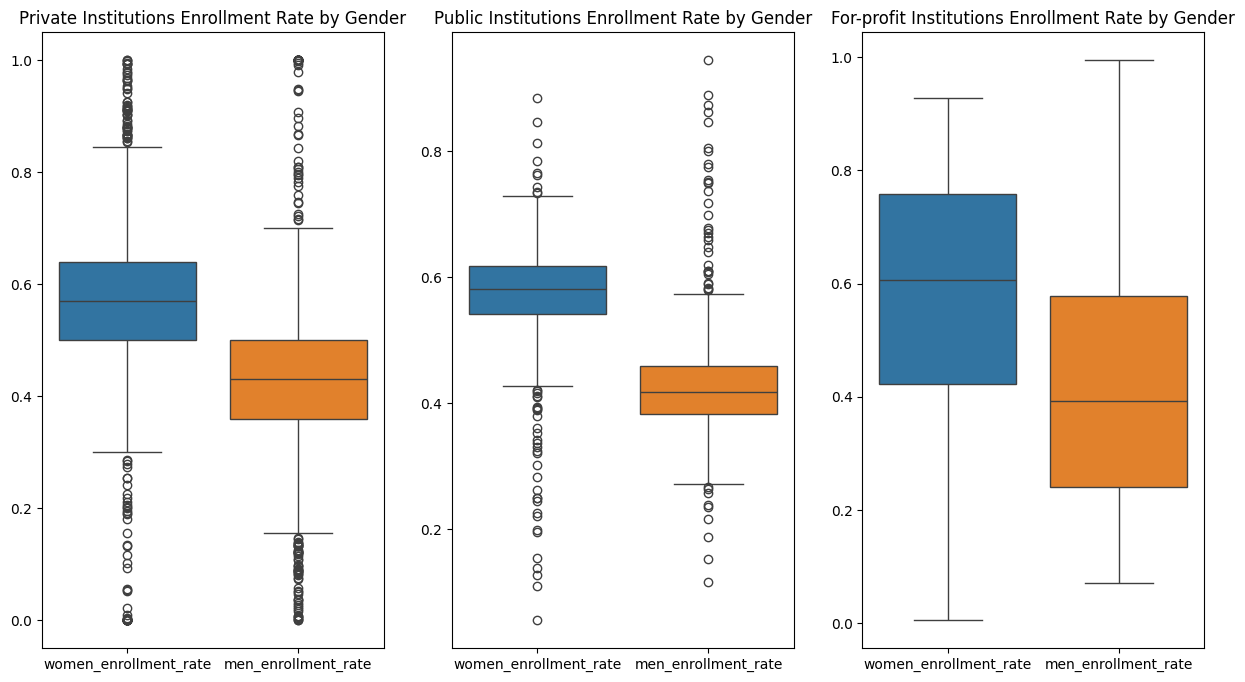

In [47]:
plt.subplots(1, 3, figsize=(15, 8))

plt.subplot(131)
sns.boxplot(data=dfGender_EnrollmentRate.loc[
    dfGender_EnrollmentRate['type'] == 'Private'])
plt.title("Private Institutions Enrollment Rate by Gender")

plt.subplot(132)
sns.boxplot(data=dfGender_EnrollmentRate.loc[
    dfGender_EnrollmentRate['type'] == 'Public'])
plt.title("Public Institutions Enrollment Rate by Gender")

plt.subplot(133)
sns.boxplot(data=dfGender_EnrollmentRate.loc[
    dfGender_EnrollmentRate['type'] == 'For Profit'])
plt.title("For-profit Institutions Enrollment Rate by Gender")

plt.show()

By creating box plots for the enrollment rates of three types of institutions categorized by gender, it becomes evident that the median enrollment rates for women in all three types of institutions are nearly identical. However, for-profit institutions, revealing a more extensive interquartile range (IQR). This expanded IQR signifies a heightened variability and spread of data points within for-profit institutions. Conversely, when considering the smaller IQR for Public Institutions, it suggests a more concentrated distribution of data. Furthermore, both Public and Private institutions display outliers in their enrollment rate data.

In [48]:
mdlEnrollment_Gender = smf.ols('women_enrollment_rate ~ type',
                                data=dfGender_EnrollmentRate).fit()
mdlEnrollment_Gender_table = sm.stats.anova_lm(mdlEnrollment_Gender,
                                               type=2)
mdlEnrollment_Gender_table

,df,sum_sq,mean_sq,F,PR(>F)
type,2.0,0.126454,0.063227,3.338467,0.035675
Residual,2156.0,40.832423,0.018939,NaN,NaN


In [49]:
dfMinorRate = df_Diversity_Tuition[df_Diversity_Tuition['category'] 
                                   == 'Total Minority']
dfMinority_Rate = dfMinorRate.loc[:, ['name', 'type', 'enrollment_rate']]
dfMinority_Rate.rename(columns={
    'enrollment_rate':'minority_enrollment_rate'}, inplace=True)
dfMinority_Rate

,name,type,minority_enrollment_rate
10,Liberty University,Private,0.235247
21,Miami Dade College,Public,0.856388
32,Grand Canyon University,For Profit,0.444177
43,University of Central Florida,Public,0.410437
54,Western Governors University,Private,0.246208
...,...,...,...
23704,Manthano Christian College,Private,0.718750
23715,Beth Hatalmud Rabbinical College,Private,0.000000
23726,Family of Faith College,Private,0.208333
23737,California Christian College,Private,0.500000


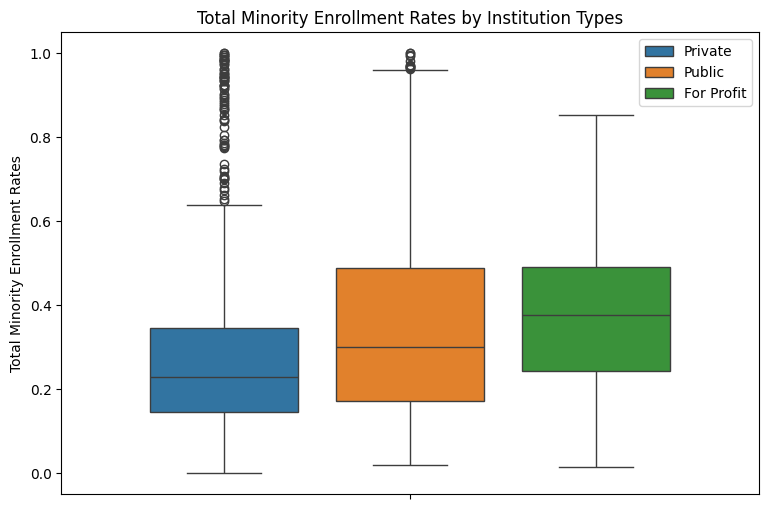

In [50]:
plt.figure(figsize=(9, 6))
sns.boxplot(y='minority_enrollment_rate',
            data=dfMinority_Rate,
            hue='type',
            gap=0.2)
plt.title("Total Minority Enrollment Rates by Institution Types")
plt.ylabel("Total Minority Enrollment Rates")
plt.legend(loc='upper right')
plt.show()

In [51]:
mdlEnrollment_Minority = smf.ols('minority_enrollment_rate ~ type',
                                  data=dfMinority_Rate).fit()
mdlEnrollment_Minority_table = sm.stats.anova_lm(mdlEnrollment_Minority, 
                                                 type=2)
mdlEnrollment_Minority_table

,df,sum_sq,mean_sq,F,PR(>F)
type,2.0,2.964037,1.482019,28.650366,5.245401e-13
Residual,2156.0,111.525005,0.051728,NaN,NaN


Analyzing box plots for enrollment rates in three institution types by gender reveals that, on average, for-profit institutions have higher median rates compared to the other two. Public institutions display a broader interquartile range (IQR), indicating increased variability. Private institutions, conversely, exhibit more outliers, signifying significant deviations in enrollment rates. This expanded IQR within for-profit institutions signifies a broader range of enrollment rates, highlighting the diverse distribution of data in this sector. Moreover, when examining private institutions, a notable observation is the presence of a relatively higher number of outliers, indicating instances where enrollment rates deviate significantly from the overall trend.

7) Join diversity_school.csv and salary_potential.csv:
Will institutions with a higher racial diversity index have alumni with better salary potentials/outcomes in early and mid-career pay?

Analysis: Linear Regression

In [52]:
dfDiversitySalary = dfSalary.copy()

In [53]:
dfDiversitySalary.set_index('name', inplace=True)

In [54]:
dfDiversitySalary = pd.merge(dfDiversitySalary,
                             dfInstitutionDiversity,
                             on='name',
                             how='inner')
dfDiversitySalary

,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,rate_squared_sum,diversity_index
name,,,,,,,,
Auburn University,1,Alabama,54400,104500,51.0,31,0.657413,0.342587
Tuskegee University,4,Alabama,54500,93500,61.0,30,0.612312,0.387688
Samford University,5,Alabama,48400,90500,52.0,3,0.668836,0.331164
Spring Hill College,6,Alabama,46600,89100,53.0,12,0.502669,0.497331
University of Alabama at Birmingham,8,Alabama,48600,87200,57.0,17,0.450916,0.549084
...,...,...,...,...,...,...,...,...
Cardinal Stritch University,20,Wisconsin,47000,82500,51.0,2,0.407148,0.592852
Wisconsin Lutheran College,20,Wisconsin,46200,82500,45.0,10,0.688792,0.311208
Viterbo University,22,Wisconsin,46800,81900,62.0,3,0.827813,0.172187


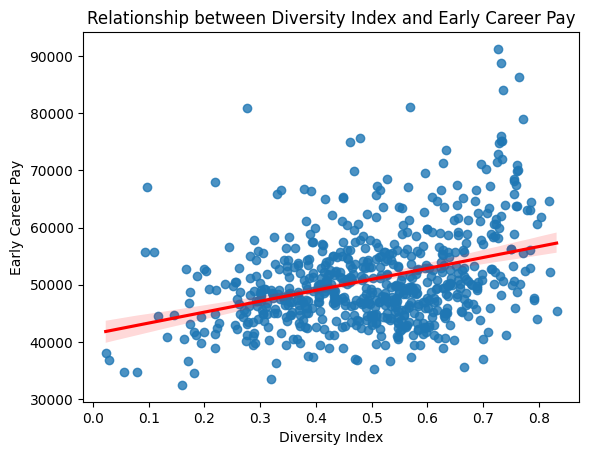

In [55]:
sns.regplot(x='diversity_index',
            y='early_career_pay',
            data=dfDiversitySalary,
            line_kws={'color':'red'})
plt.title('Relationship between Diversity Index and Early Career Pay')
plt.xlabel('Diversity Index')
plt.ylabel('Early Career Pay')
plt.show()

In [56]:
mdlDiversitySalary = smf.ols('early_career_pay ~ diversity_index',
                             data=dfDiversitySalary).fit()
mdlDiversitySalary.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       early_career_pay   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     95.09
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           4.36e-21
Time:                        23:31:33   Log-Likelihood:                -6920.8
No. Observations:                 666   AIC:                         1.385e+04
Df Residuals:                     664   BIC:                         1.385e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         4.14e+04   1023.663     40.444      0.000    3.94e+04    4.34e+04
diversity_index  1.908e+04   1956.622      9.751      0.000    1.52e+04    2.29e+04
==============================================================================
Omnibus:                      121.679   Durbin-Watson:                   0.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.672
Skew:                           1.042   Prob(JB):                     2.46e-52
Kurtosis:                       5.054   Cond. No.                         8.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
dfDiversitySalary

,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,rate_squared_sum,diversity_index
name,,,,,,,,
Auburn University,1,Alabama,54400,104500,51.0,31,0.657413,0.342587
Tuskegee University,4,Alabama,54500,93500,61.0,30,0.612312,0.387688
Samford University,5,Alabama,48400,90500,52.0,3,0.668836,0.331164
Spring Hill College,6,Alabama,46600,89100,53.0,12,0.502669,0.497331
University of Alabama at Birmingham,8,Alabama,48600,87200,57.0,17,0.450916,0.549084
...,...,...,...,...,...,...,...,...
Cardinal Stritch University,20,Wisconsin,47000,82500,51.0,2,0.407148,0.592852
Wisconsin Lutheran College,20,Wisconsin,46200,82500,45.0,10,0.688792,0.311208
Viterbo University,22,Wisconsin,46800,81900,62.0,3,0.827813,0.172187


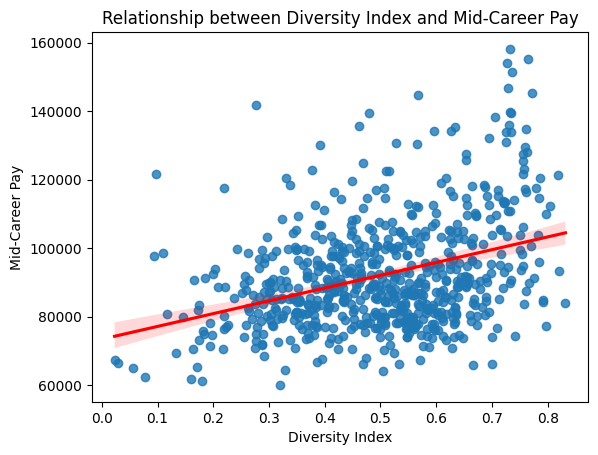

In [58]:
sns.regplot(x='diversity_index',
            y='mid_career_pay',
            data=dfDiversitySalary,
            line_kws={'color':'red'})
plt.title('Relationship between Diversity Index and Mid-Career Pay')
plt.xlabel('Diversity Index')
plt.ylabel('Mid-Career Pay')
plt.show()

In [59]:
mdlDiversitySalary_mid = smf.ols('mid_career_pay ~ diversity_index',
                                 data=dfDiversitySalary).fit()
mdlDiversitySalary_mid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         mid_career_pay   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     101.4
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           2.73e-22
Time:                        23:31:33   Log-Likelihood:                -7346.3
No. Observations:                 666   AIC:                         1.470e+04
Df Residuals:                     664   BIC:                         1.471e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7.345e+04   1939.349     37.875      0.000    6.96e+04    7.73e+04
diversity_index  3.732e+04   3706.856     10.069      0.000       3e+04    4.46e+04
==============================================================================
Omnibus:                       94.406   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.138
Skew:                           0.944   Prob(JB):                     5.02e-32
Kurtosis:                       4.278   Cond. No.                         8.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The two presented scatterplots show positive relationships between both salary outcomes in early and mid-career pay and the institution's diversity index, meaning that institutions with higher diversity index are more likely to have alumni with better salary outcomes. Further regression analysis we conducted shows that both positive correlations are statistically significant, as evidenced by both p-values below 0.05. We speculate that the positive correlation between career pay and diversity indices may stem from the concept that more diverse institutions foster an environment where students learn to adapt effectively to diverse workplaces. This adaptability is valuable in today's interconnected professional landscape, potentially contributing to higher career pay for individuals who have experienced a diverse educational setting. The correlation suggests a potential link between diversity exposure during education and the ability to navigate and excel in varied work environments.

8) Salary_potential.csv:
Will institutions with higher percentage STEM programs have alumni with better salary potentials/outcomes in early career pay?

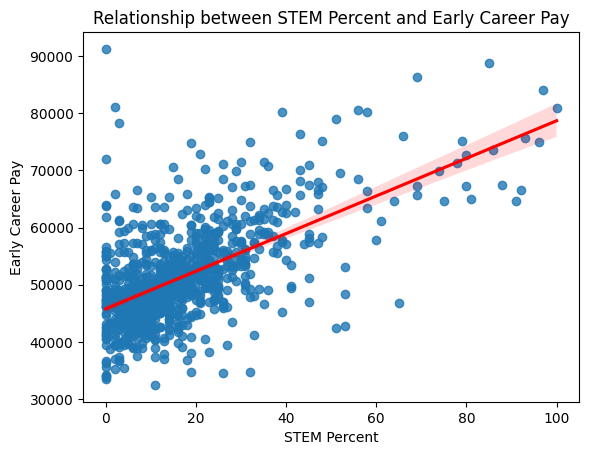

In [60]:
sns.regplot(x='stem_percent',
            y='early_career_pay',
            data=dfSalary,
            line_kws={'color':'red'})
plt.title('Relationship between STEM Percent and Early Career Pay')
plt.xlabel('STEM Percent')
plt.ylabel('Early Career Pay')
plt.show()

In [61]:
correlation = dfSalary['stem_percent'].corr(dfSalary['early_career_pay'])
print(f"Correlation coefficient between STEM percent and early career pay: \
{correlation}")

Correlation coefficient between STEM percent and early career pay: 0.6050609108542346


In [62]:
mdlSTEM_EarlyCareerPay = smf.ols('early_career_pay ~ stem_percent',
                                 data=dfSalary).fit()
mdlSTEM_EarlyCareerPay.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       early_career_pay   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     538.8
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           1.89e-94
Time:                        23:31:34   Log-Likelihood:                -9557.9
No. Observations:                 935   AIC:                         1.912e+04
Df Residuals:                     933   BIC:                         1.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.578e+04    324.315    141.173      0.000    4.51e+04    4.64e+04
stem_percent   328.7150     14.161     23.213      0.000     300.924     356.506
==============================================================================
Omnibus:                      197.673   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.241
Skew:                           0.946   Prob(JB):                    2.52e-172
Kurtosis:                       7.087   Cond. No.                         34.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The presented scatterplot indicates a positive relationship between the percentage of STEM programs in the institution and its alumni's early career pay, meaning that institutions with a higher percentage of STEM programs foster students with better potential salaries in their early careers. Further regression analysis we conducted shows that the positive correlation is statistically significant, as evidenced by the p-value below 0.05. We speculate that the positive relationship may arise from the high demand for STEM-related skills in the job market.

9) Salary_potential.csv:
The relationship between the ‘make the world a better place percentage’ and ‘the STEM percentage’.

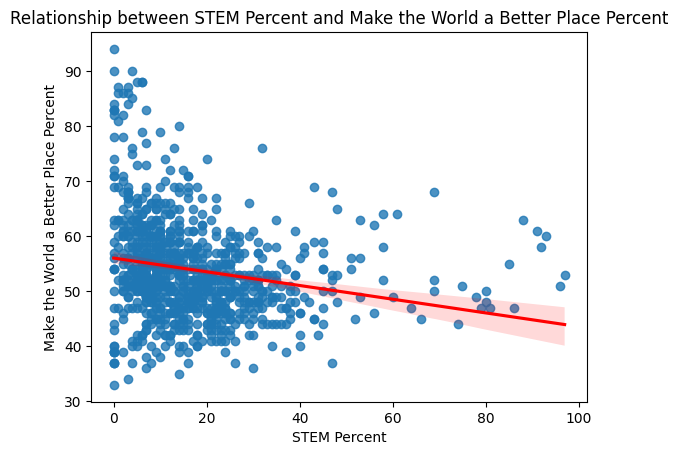

In [63]:
sns.regplot(x='stem_percent',
            y='make_world_better_percent',
            data=dfSalary,
            line_kws={'color':'red'})
plt.title('Relationship between STEM Percent and \
Make the World a Better Place Percent')
plt.xlabel('STEM Percent')
plt.ylabel('Make the World a Better Place Percent')
plt.show()

In [64]:
correlation = dfSalary['stem_percent'].corr(
    dfSalary['make_world_better_percent'])
print(f"Correlation coefficient between STEM percent and \
'Make the World a Better Place' percent: {correlation}")

Correlation coefficient between STEM percent and 'Make the World a Better Place' percent: -0.2042355678909225


In [65]:
mdlStemMWBP = smf.ols('make_world_better_percent ~ stem_percent',
                      data=dfSalary).fit()
mdlStemMWBP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     make_world_better_percent   R-squared:                       0.042
Model:                                   OLS   Adj. R-squared:                  0.041
Method:                        Least Squares   F-statistic:                     39.18
Date:                       Wed, 06 Dec 2023   Prob (F-statistic):           5.99e-10
Time:                               23:31:34   Log-Likelihood:                -3260.8
No. Observations:                        902   AIC:                             6526.
Df Residuals:                            900   BIC:                             6535.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       56.0277      0.456    122.921      0.000      55.133      56.922
stem_percent    -0.1244      0.020     -6.259      0.000      -0.163      -0.085
==============================================================================
Omnibus:                      145.073   Durbin-Watson:                   1.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.454
Skew:                           0.957   Prob(JB):                     1.53e-60
Kurtosis:                       4.915   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The presented scatterplot indicates a negative relationship between the percentage of STEM programs in the institution and the percentage of their alumni feeling that they make the world a better place. Further regression analysis we conducted shows that the negative correlation is statistically significant, as evidenced by the p-value below 0.05. We speculate that the negative relationship may arise from the specialized nature of STEM education, which often focuses on technical skills rather than explicitly emphasizing societal impact. Therefore, graduates from institutions with a higher percentage of STEM programs may perceive their roles as task-oriented instead of actually bringing a positive impact to the world themselves.

10) Join diversity_school.csv and salary_potential.csv:
The relationship between the ‘make the world a better place percentage’ and diversity index

In [66]:
dfDiversitySalary

,rank,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,rate_squared_sum,diversity_index
name,,,,,,,,
Auburn University,1,Alabama,54400,104500,51.0,31,0.657413,0.342587
Tuskegee University,4,Alabama,54500,93500,61.0,30,0.612312,0.387688
Samford University,5,Alabama,48400,90500,52.0,3,0.668836,0.331164
Spring Hill College,6,Alabama,46600,89100,53.0,12,0.502669,0.497331
University of Alabama at Birmingham,8,Alabama,48600,87200,57.0,17,0.450916,0.549084
...,...,...,...,...,...,...,...,...
Cardinal Stritch University,20,Wisconsin,47000,82500,51.0,2,0.407148,0.592852
Wisconsin Lutheran College,20,Wisconsin,46200,82500,45.0,10,0.688792,0.311208
Viterbo University,22,Wisconsin,46800,81900,62.0,3,0.827813,0.172187


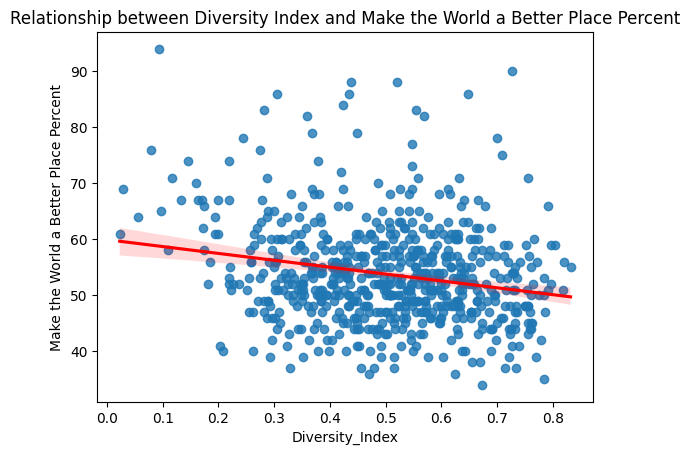

In [67]:
sns.regplot(x='diversity_index',
            y='make_world_better_percent',
            data=dfDiversitySalary,
            line_kws={'color':'red'})
plt.title('Relationship between Diversity Index and \
Make the World a Better Place Percent')
plt.xlabel('Diversity_Index')
plt.ylabel('Make the World a Better Place Percent')
plt.show()

In [68]:
correlation = dfDiversitySalary['diversity_index'].corr(
    dfDiversitySalary['make_world_better_percent'])
print(f"Correlation coefficient between 'Diversity Index' and \
'Make the World a Better Place' percent: {correlation}")

Correlation coefficient between 'Diversity Index' and 'Make the World a Better Place' percent: -0.21135295950674535


In [69]:
mdlDiversityMWBP = smf.ols('make_world_better_percent ~ diversity_index',
                           data=dfDiversitySalary).fit()
mdlDiversityMWBP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     make_world_better_percent   R-squared:                       0.045
Model:                                   OLS   Adj. R-squared:                  0.043
Method:                        Least Squares   F-statistic:                     30.21
Date:                       Wed, 06 Dec 2023   Prob (F-statistic):           5.60e-08
Time:                               23:31:34   Log-Likelihood:                -2331.9
No. Observations:                        648   AIC:                             4668.
Df Residuals:                            646   BIC:                             4677.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          59.9114      1.172     51.098      0.000      57.609      62.214
diversity_index   -12.2727      2.233     -5.496      0.000     -16.658      -7.888
==============================================================================
Omnibus:                      114.604   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.424
Skew:                           0.997   Prob(JB):                     9.21e-51
Kurtosis:                       5.135   Cond. No.                         8.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The presented scatterplot indicates a negative relationship between the institution's diversity index and the percentage of their alumni feeling that they make the world a better place. Further regression analysis we conducted shows that the negative relationship is statistically significant, as evidenced by the p-value below 0.05. We speculate that as more students from different backgrounds, mostly less privileged backgrounds, study at institutions with higher diversity, the alumni from the institutions are reasonably less confident in making the world a better place.

11) Join diversity_school.csv and field_of_study.csv:
Is there a relationship between racial diversity and the areas of study?

In [70]:
dfFieldOfStudy

,UNITID,OPEID6,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC
0,100654.0,1002,Alabama A & M University,Public,100,"Agriculture, General.",3,Bachelor’s Degree
1,100654.0,1002,Alabama A & M University,Public,109,Animal Sciences.,3,Bachelor’s Degree
2,100654.0,1002,Alabama A & M University,Public,110,Food Science and Technology.,3,Bachelor’s Degree
3,100654.0,1002,Alabama A & M University,Public,110,Food Science and Technology.,5,Master's Degree
4,100654.0,1002,Alabama A & M University,Public,110,Food Science and Technology.,6,Doctoral Degree
...,...,...,...,...,...,...,...,...
228755,NaN,42889,Pearlands Innovative School of Beauty,"Private, for-profit",1204,Cosmetology and Related Personal Grooming Serv...,1,NaN
228756,NaN,42896,Durant Institute of Hair Design,"Private, for-profit",1204,Cosmetology and Related Personal Grooming Serv...,1,NaN
228757,NaN,42898,Meryma'at Barber College,"Private, for-profit",1204,Cosmetology and Related Personal Grooming Serv...,1,NaN
228758,NaN,42924,Body Wisdom Massage Therapy School,"Private, for-profit",5135,Somatic Bodywork and Related Therapeutic Servi...,1,NaN


In [71]:
dfFieldOfStudy['CIPDESC'] = dfFieldOfStudy['CIPDESC'].str.lower()

In [72]:
dfFieldOfStudy[dfFieldOfStudy['CIPDESC'].isna()]

,UNITID,OPEID6,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC
13305,110778.0,22676,Sofia University,"Private, for-profit",4200,NaN,5,NaN
134104,203720.0,21585,Ohio Business College-Sheffield,"Private, for-profit",1100,NaN,1,NaN
201099,413820.0,25565,Yukon Beauty College Inc,"Private, for-profit",1200,NaN,1,NaN


The three institutions have missing values in the area of study probably due to the specialized education they provide. It is reasonable to impute them with 'Unknown'.

In [73]:
dfFieldOfStudy['CIPDESC'].fillna('Unknown', inplace=True)

In [74]:
len(dfFieldOfStudy['CIPDESC'].unique())

412

In [75]:
dfFieldOfStudy['CIPDESC'].unique()

array(['agriculture, general.', 'animal sciences.',
       'food science and technology.', 'plant sciences.',
       'agriculture, agriculture operations, and related sciences, other.',
       'forestry.', 'city/urban, community and regional planning.',
       'communication and media studies.',
       'audiovisual communications technologies/technicians.',
       'computer and information sciences, general.',
       'education, general.',
       'educational administration and supervision.',
       'special education and teaching.',
       'teacher education and professional development, specific levels and methods.',
       'teacher education and professional development, specific subject areas.',
       'civil engineering.',
       'electrical, electronics and communications engineering.',
       'mechanical engineering.', 'engineering, other.',
       'electrical engineering technologies/technicians.',
       'mechanical engineering related technologies/technicians.',
       'const

There are 412 unique areas of study in the dfFieldOfStudy dataset.

In [76]:
ptnEng = 'engineer'
ptnSci = 'science'
ptnLit = 'literature'
ptnArt = 'art'
ptnBio = 'bio'
ptnMng = 'management'
ptnList = [ptnEng, ptnSci, ptnLit, ptnArt, ptnBio, ptnMng]

The above are some of the word patterns to distinguish the areas of study.

In [77]:
dfFieldOfStudy['CIPDESC'][dfFieldOfStudy['CIPDESC'].str.contains(ptnEng)]

26                                       civil engineering.
27        electrical, electronics and communications eng...
28                                  mechanical engineering.
29                                      engineering, other.
30         electrical engineering technologies/technicians.
                                ...                        
228601    mechatronics, robotics, and automation enginee...
228602     electrical engineering technologies/technicians.
228604    drafting/design engineering technologies/techn...
228659       computer engineering technologies/technicians.
228660    drafting/design engineering technologies/techn...
Name: CIPDESC, Length: 13487, dtype: object

In [78]:
fieldName = ['Prct_Engineering', 'Prct_Science', 'Prct_Literature', 
             'Prct_Arts', 'Prct_Bio', 'Prct_Mng']

In [79]:
dfFields = []
for ptn in ptnList:
    dfField = dfFieldOfStudy.groupby('INSTNM')['CIPDESC'].apply(
        lambda ser: ser.str.contains(ptn).sum()/len(ser))
    dfField = dfField.to_frame(name=fieldName[ptnList.index(ptn)])
    dfFields.append(dfField)

In [80]:
dfPrctField = dfFields.pop(0)
for i in range(5):
    dfPrctField = dfPrctField.join(dfFields.pop(0))
dfPrctField

,Prct_Engineering,Prct_Science,Prct_Literature,Prct_Arts,Prct_Bio,Prct_Mng
INSTNM,,,,,,
A & W Healthcare Educators,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A Better U Beauty Barber Academy,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
A T Still University of Health Sciences,0.000000,0.333333,0.0,0.000000,0.037037,0.000000
ABC Adult School,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
ABC Beauty Academy,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
Z Hair Academy,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
ZMS The Academy,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Zane State College,0.140351,0.087719,0.0,0.070175,0.000000,0.122807


In [81]:
dfInstitutionDiversity

,rate_squared_sum,diversity_index
name,,
A.T. Still University of Health Sciences,0.408318,0.591682
AIB College of Business,0.379891,0.620109
AOMA Graduate School of Integrative Medicine,0.518690,0.481310
ASA Institute of Business and Computer Technology,0.285844,0.714156
ATA Career Education,0.378971,0.621029
...,...,...
Youngstown State University,0.590584,0.409416
Yuba College,0.296689,0.703311
Zane State College,0.646188,0.353812


In [82]:
dfDiversityFieldOfStudy = dfPrctField.join(dfInstitutionDiversity, how='inner')
dfDiversityFieldOfStudy

,Prct_Engineering,Prct_Science,Prct_Literature,Prct_Arts,Prct_Bio,Prct_Mng,rate_squared_sum,diversity_index
AOMA Graduate School of Integrative Medicine,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518690,0.481310
ATA Career Education,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.378971,0.621029
ATA College,0.051282,0.076923,0.000000,0.000000,0.000000,0.102564,0.319628,0.680372
Aaniiih Nakoda College,0.000000,0.190476,0.000000,0.047619,0.000000,0.000000,0.786823,0.213177
Abilene Christian University,0.011628,0.104651,0.034884,0.058140,0.023256,0.069767,0.475445,0.524555
...,...,...,...,...,...,...,...,...
Yorktowne Business Institute,0.000000,0.000000,0.000000,0.400000,0.000000,0.200000,0.406440,0.593560
Young Harris College,0.000000,0.037037,0.074074,0.148148,0.037037,0.037037,0.597453,0.402547
Youngstown State University,0.122340,0.117021,0.026596,0.063830,0.026596,0.085106,0.590584,0.409416
Yuba College,0.000000,0.089552,0.014925,0.104478,0.029851,0.029851,0.296689,0.703311


The above dataset discloses the percentage of engineering, science, literature, arts, bio-related, and management majors of the institutions.

In [83]:
fieldSubplotTitle = ['Percentage of Engineering Majors', 
                        'Percentage of Science Majors', 
                        'Percentage of Literature Majors', 
                        'Percentage of Arts Majors', 
                        'Percentage of Bio-related Majors', 
                        'Percentage of Management Majors']

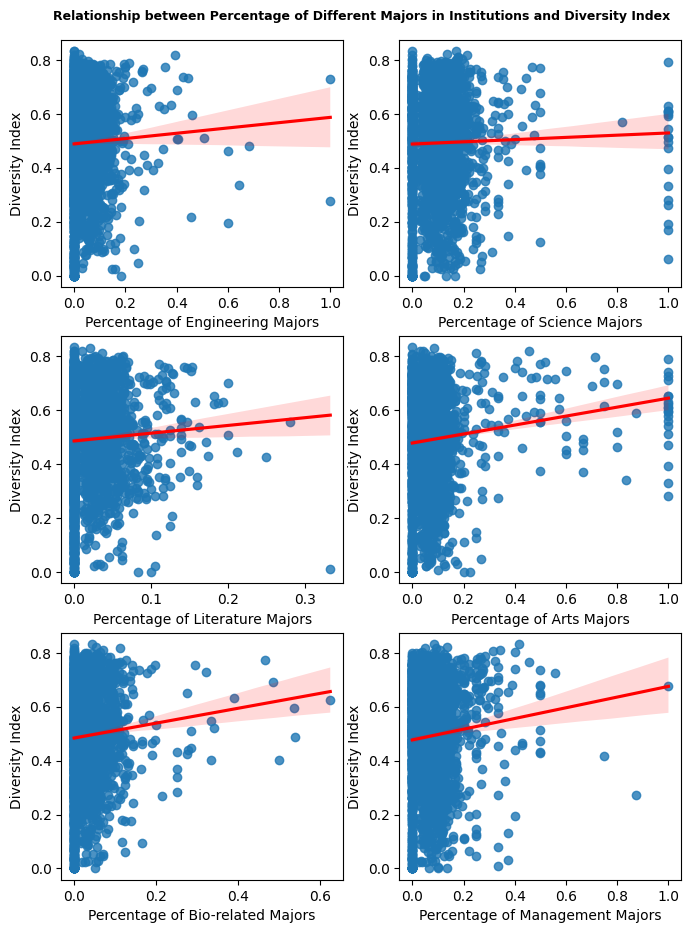

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))

for i, ax in zip(range(6), axes.flat):
    cat = fieldName[i]
    sns.regplot(data=dfDiversityFieldOfStudy,
                y='diversity_index',
                x=cat,
                line_kws={'color':'red'},
                ax=ax)
    ax.set_xlabel(fieldSubplotTitle[i])
    ax.set_ylabel("Diversity Index")

plt.suptitle(("Relationship between Percentage of Different Majors \
in Institutions and Diversity Index"),
               fontsize=9, fontweight='bold')

plt.subplots_adjust(top=0.95)

plt.show()

From the plots we can see the distribution of the percentage of each kind of majors are all concentrated on the lower end of the spectrum. While we might conclude that diversity index does not correlate with the percentage since low percentage of a specific field of study happens in institutions with all levels of diversity index score. However, as we look at institutions with higher percentage of Literature, Arts, and Bio-related majors, they tend to also have higher diversity indices, with an obvious outlier at the bottom right of the plot of literature majors. The same does not apply to the percentage of engineering, science, and management majors. We can also see many institutions with 100% science majors or 100% arts majors.

In [85]:
mdlDiversity_Engineering = smf.ols('diversity_index ~ Prct_Engineering',
                                   data=dfDiversityFieldOfStudy).fit()
mdlDiversity_Engineering.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.279
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0703
Time:                        23:31:42   Log-Likelihood:                 665.99
No. Observations:                2388   AIC:                            -1328.
Df Residuals:                    2386   BIC:                            -1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4882      0.004    112.197      0.000       0.480       0.497
Prct_Engineering     0.0983      0.054      1.811      0.070      -0.008       0.205
==============================================================================
Omnibus:                      130.054   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.326
Skew:                          -0.605   Prob(JB):                     3.75e-33
Kurtosis:                       2.804   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
mdlDiversity_Engineering = smf.ols('diversity_index ~ Prct_Engineering',
                                   data=dfDiversityFieldOfStudy).fit()
mdlDiversity_Engineering.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.279
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0703
Time:                        23:31:42   Log-Likelihood:                 665.99
No. Observations:                2388   AIC:                            -1328.
Df Residuals:                    2386   BIC:                            -1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4882      0.004    112.197      0.000       0.480       0.497
Prct_Engineering     0.0983      0.054      1.811      0.070      -0.008       0.205
==============================================================================
Omnibus:                      130.054   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.326
Skew:                          -0.605   Prob(JB):                     3.75e-33
Kurtosis:                       2.804   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
mdlDiversity_Literature = smf.ols('diversity_index ~ Prct_Literature',
                                  data=dfDiversityFieldOfStudy).fit()
mdlDiversity_Literature.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     5.977
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0146
Time:                        23:31:42   Log-Likelihood:                 667.34
No. Observations:                2388   AIC:                            -1331.
Df Residuals:                    2386   BIC:                            -1319.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4861      0.005    107.621      0.000       0.477       0.495
Prct_Literature     0.2869      0.117      2.445      0.015       0.057       0.517
==============================================================================
Omnibus:                      127.447   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.528
Skew:                          -0.596   Prob(JB):                     2.51e-32
Kurtosis:                       2.794   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

12) Join diversity_school.csv and field_of_study.csv:
Is there a relationship between racial diversity and levels of degree?

In [88]:
dfLevelofDegreeDiversity = pd.merge(dfFieldOfStudy,
                                    dfInstitutionDiversity,
                                    left_on='INSTNM',
                                    right_on='name')

In [89]:
dfLevelofDegreeDiversity = dfLevelofDegreeDiversity.dropna(
    subset=['CREDDESC', 'diversity_index'])
dfLevelofDegreeDiversity

,UNITID,OPEID6,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC,rate_squared_sum,diversity_index
0,100663.0,1052,University of Alabama at Birmingham,Public,502,"ethnic, cultural minority, gender, and group s...",3,Bachelor’s Degree,0.450916,0.549084
1,100663.0,1052,University of Alabama at Birmingham,Public,901,communication and media studies.,3,Bachelor’s Degree,0.450916,0.549084
2,100663.0,1052,University of Alabama at Birmingham,Public,901,communication and media studies.,5,Master's Degree,0.450916,0.549084
3,100663.0,1052,University of Alabama at Birmingham,Public,1101,"computer and information sciences, general.",3,Bachelor’s Degree,0.450916,0.549084
4,100663.0,1052,University of Alabama at Birmingham,Public,1101,"computer and information sciences, general.",5,Master's Degree,0.450916,0.549084
...,...,...,...,...,...,...,...,...,...,...
133991,NaN,42171,Rudolf Steiner College,"Private, nonprofit",1312,teacher education and professional development...,5,Master's Degree,0.336578,0.663422
133992,NaN,42279,Morthland College,"Private, nonprofit",3022,classical and ancient studies.,3,Bachelor’s Degree,0.485513,0.514487
133993,NaN,42279,Morthland College,"Private, nonprofit",5202,"business administration, management and operat...",3,Bachelor’s Degree,0.485513,0.514487
133994,NaN,42345,Burnett International College,"Private, for-profit",5138,"registered nursing, nursing administration, nu...",1,Undergraduate Certificate or Diploma,0.930751,0.069249


In [90]:
unique_cred_desc_values = dfLevelofDegreeDiversity['CREDDESC'].unique()
print("Unique values in CREDDESC column:", unique_cred_desc_values)

Unique values in CREDDESC column: ['Bachelor’s Degree' "Master's Degree" 'Doctoral Degree'
 'Graduate/Professional Certificate' 'First Professional Degree'
 'Undergraduate Certificate or Diploma' "Associate's Degree"
 'Post-baccalaureate Certificate']


we can see from the above code cell the types of degrees provided by the institutions in the dataset.

In [91]:
dfLevelofDegreeDiversity

,UNITID,OPEID6,INSTNM,CONTROL,CIPCODE,CIPDESC,CREDLEV,CREDDESC,rate_squared_sum,diversity_index
0,100663.0,1052,University of Alabama at Birmingham,Public,502,"ethnic, cultural minority, gender, and group s...",3,Bachelor’s Degree,0.450916,0.549084
1,100663.0,1052,University of Alabama at Birmingham,Public,901,communication and media studies.,3,Bachelor’s Degree,0.450916,0.549084
2,100663.0,1052,University of Alabama at Birmingham,Public,901,communication and media studies.,5,Master's Degree,0.450916,0.549084
3,100663.0,1052,University of Alabama at Birmingham,Public,1101,"computer and information sciences, general.",3,Bachelor’s Degree,0.450916,0.549084
4,100663.0,1052,University of Alabama at Birmingham,Public,1101,"computer and information sciences, general.",5,Master's Degree,0.450916,0.549084
...,...,...,...,...,...,...,...,...,...,...
133991,NaN,42171,Rudolf Steiner College,"Private, nonprofit",1312,teacher education and professional development...,5,Master's Degree,0.336578,0.663422
133992,NaN,42279,Morthland College,"Private, nonprofit",3022,classical and ancient studies.,3,Bachelor’s Degree,0.485513,0.514487
133993,NaN,42279,Morthland College,"Private, nonprofit",5202,"business administration, management and operat...",3,Bachelor’s Degree,0.485513,0.514487
133994,NaN,42345,Burnett International College,"Private, for-profit",5138,"registered nursing, nursing administration, nu...",1,Undergraduate Certificate or Diploma,0.930751,0.069249


In [92]:
# Create a new DataFrame to store the results
# Assuming 'INSTNM' is the school name
dfLevelPrctField = pd.DataFrame(index=dfFieldOfStudy['INSTNM'].unique())

# List of degree types to calculate percentages for
degree_types = ["Bachelor’s Degree", "Master's Degree", "Doctoral Degree",
                "Graduate/Professional Certificate", 
                "First Professional Degree",
                "Undergraduate Certificate or Diploma", "Associate's Degree",
                "Post-baccalaureate Certificate"]

# Convert 'CREDDESC' to string values
dfFieldOfStudy['CREDDESC'] = dfFieldOfStudy['CREDDESC'].astype(str)

# Calculate percentages for each degree type
for degree_type in degree_types:
    degreeGrp = dfFieldOfStudy.groupby('INSTNM')['CREDDESC']
    degreePrct = degreeGrp.apply(
        lambda ser: ser.str.contains(degree_type, case=False).sum()/len(ser))
    dfLevelPrctField[degree_type] = degreePrct.to_numpy()

# Display the resulting dataframe
dfLevelPrctField

,Bachelor’s Degree,Master's Degree,Doctoral Degree,Graduate/Professional Certificate,First Professional Degree,Undergraduate Certificate or Diploma,Associate's Degree,Post-baccalaureate Certificate
Alabama A & M University,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
University of Alabama at Birmingham,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Amridge University,0.0,0.222222,0.259259,0.148148,0.259259,0.000000,0.000000,0.111111
University of Alabama in Huntsville,0.0,0.000000,0.000000,0.000000,0.000000,0.875000,0.000000,0.000000
Alabama State University,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
Pearlands Innovative School of Beauty,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Durant Institute of Hair Design,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Meryma'at Barber College,0.0,0.000000,0.000000,0.000000,0.000000,0.368421,0.631579,0.000000
Body Wisdom Massage Therapy School,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


We calculate the percentage of different degrees in all degrees provided by each institution.

In [93]:
dfLevelPrctField = dfLevelPrctField.join(dfInstitutionDiversity, how='inner')
dfLevelPrctField.head()

,Bachelor’s Degree,Master's Degree,Doctoral Degree,Graduate/Professional Certificate,First Professional Degree,Undergraduate Certificate or Diploma,Associate's Degree,Post-baccalaureate Certificate,rate_squared_sum,diversity_index
University of Alabama at Birmingham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450916,0.549084
Amridge University,0.000000,0.222222,0.259259,0.148148,0.259259,0.000000,0.000000,0.111111,0.333381,0.666619
Alabama State University,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.806868,0.193132
Central Alabama Community College,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.601025,0.398975
Athens State University,0.421053,0.105263,0.000000,0.000000,0.000000,0.210526,0.263158,0.000000,0.618227,0.381773


In [94]:
dfLevelPrctField.columns = ['Prct_bachelor', 'Prct_master', 'Prct_doctoral', 
                            'Prct_grad_cert', 'Prct_first_deg', 
                            'Prct_undergrad_cert', 'Prct_assoc_deg', 
                            'Prct_post_bacc_cert', 'rate_squared_sum', 
                            'diversity_index']
dfLevelPrctField.head()

,Prct_bachelor,Prct_master,Prct_doctoral,Prct_grad_cert,Prct_first_deg,Prct_undergrad_cert,Prct_assoc_deg,Prct_post_bacc_cert,rate_squared_sum,diversity_index
University of Alabama at Birmingham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.450916,0.549084
Amridge University,0.000000,0.222222,0.259259,0.148148,0.259259,0.000000,0.000000,0.111111,0.333381,0.666619
Alabama State University,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.806868,0.193132
Central Alabama Community College,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.601025,0.398975
Athens State University,0.421053,0.105263,0.000000,0.000000,0.000000,0.210526,0.263158,0.000000,0.618227,0.381773


In [95]:
degreeName = dfLevelPrctField.columns[:8]
degreeName

Index(['Prct_bachelor', 'Prct_master', 'Prct_doctoral', 'Prct_grad_cert',
       'Prct_first_deg', 'Prct_undergrad_cert', 'Prct_assoc_deg',
       'Prct_post_bacc_cert'],
      dtype='object')

In [96]:
degreeSubplotTitle = ['Percentage of Bachelor\'s Degrees', 
                      'Percentage of Master\'s Degrees', 
                      'Percentage of Doctoral Degrees', 
                      'Percentage of Graduate Certificates', 
                      'Percentage of First Professional Degrees', 
                      'Percentage of Undergraduate Certificates', 
                      'Percentage of Associate\'s Degrees', 
                      'Percentage of Post-baccalaureate Certificates']

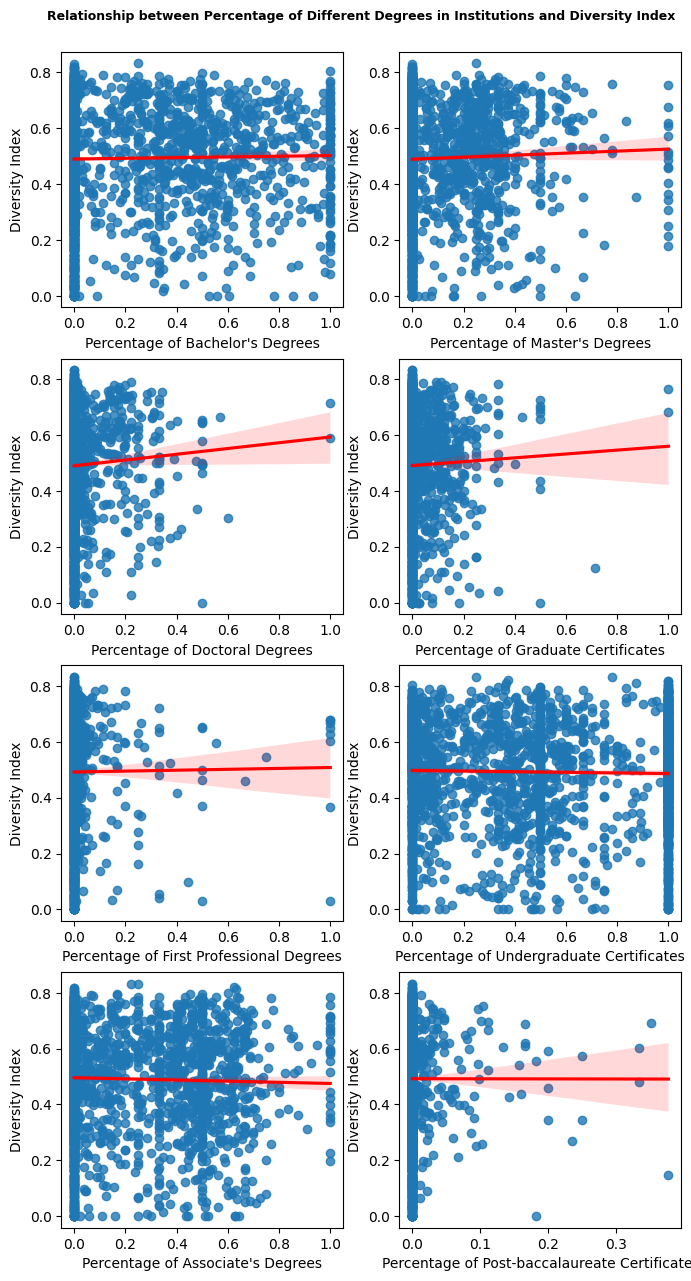

In [97]:
fig, axes = plt.subplots(4, 2, figsize=(8, 14))

for i, ax in zip(range(8), axes.flat):
    cat = degreeName[i]
    sns.regplot(data=dfLevelPrctField,
                y='diversity_index',
                x=cat,
                line_kws={'color':'red'},
                ax=ax)
    ax.set_xlabel(degreeSubplotTitle[i])
    ax.set_ylabel("Diversity Index")

plt.suptitle(("Relationship between Percentage of Different Degrees \
in Institutions and Diversity Index"),
               fontsize=9, fontweight='bold')

plt.subplots_adjust(top=0.95)

plt.show()

The presented scatterplots show the relationships between percentages of different institution degrees and diversity indices. Notably, the results for Master's Degrees, Doctoral Degrees, and Graduate Certificates show slightly positive relationships with diversity indices. Conversely, results in other groups show either no correlation or slight negative associations with diversity indices. To validate the statistical significance of these relationships, regression analyses were conducted. The results indicate that only the positive relationship between the percentage of institution Doctoral Degrees and its Diversity Index was statistically significant, with a p-value below 0.05 (p-value = 0.037), while other groups did not show statistical significance.

We initially speculated that higher percentages of higher education levels might be positively correlated with higher diversity indices due to the expectation that advanced academic programs, such as Master's Degrees, Doctoral Degrees, and Graduate Certificates, often attract a more diverse cohort of students (e.g., international students). The results from both visualizations and statistical analyses aligned with our initial speculation, confirming the expected positive relationship. However, it's worth noting that statistical significance was only confirmed within the Doctoral Degrees group.

In [98]:
mdlDiversity_Bach = smf.ols('diversity_index ~ Prct_bachelor',
                            data=dfLevelPrctField).fit()
mdlDiversity_Bach.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9214
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.337
Time:                        23:31:53   Log-Likelihood:                 664.81
No. Observations:                2388   AIC:                            -1326.
Df Residuals:                    2386   BIC:                            -1314.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4899      0.004    110.146      0.000       0.481       0.499
Prct_bachelor     0.0124      0.013      0.960      0.337      -0.013       0.038
==============================================================================
Omnibus:                      130.453   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.267
Skew:                          -0.608   Prob(JB):                     2.34e-33
Kurtosis:                       2.819   Cond. No.                         3.58
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
mdlDiversity_Master = smf.ols('diversity_index ~ Prct_master',
                              data=dfLevelPrctField).fit()
mdlDiversity_Master.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.546
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.111
Time:                        23:31:53   Log-Likelihood:                 665.63
No. Observations:                2388   AIC:                            -1327.
Df Residuals:                    2386   BIC:                            -1316.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4893      0.004    116.699      0.000       0.481       0.497
Prct_master     0.0363      0.023      1.596      0.111      -0.008       0.081
==============================================================================
Omnibus:                      131.038   Durbin-Watson:                   1.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.211
Skew:                          -0.610   Prob(JB):                     1.46e-33
Kurtosis:                       2.825   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
mdlDiversity_Doc = smf.ols('diversity_index ~ Prct_doctoral',
                           data=dfLevelPrctField).fit()
mdlDiversity_Doc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.340
Date:                Wed, 06 Dec 2023   Prob (F-statistic):             0.0373
Time:                        23:31:53   Log-Likelihood:                 666.52
No. Observations:                2388   AIC:                            -1329.
Df Residuals:                    2386   BIC:                            -1317.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4900      0.004    125.560      0.000       0.482       0.498
Prct_doctoral     0.1032      0.050      2.083      0.037       0.006       0.200
==============================================================================
Omnibus:                      131.169   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.374
Skew:                          -0.610   Prob(JB):                     1.35e-33
Kurtosis:                       2.825   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
mdlDiversity_UndergradCert = smf.ols('diversity_index ~ Prct_undergrad_cert',
                                     data=dfLevelPrctField).fit()
mdlDiversity_UndergradCert.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.501
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.221
Time:                        23:31:53   Log-Likelihood:                 665.10
No. Observations:                2388   AIC:                            -1326.
Df Residuals:                    2386   BIC:                            -1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4976      0.006     86.575      0.000       0.486       0.509
Prct_undergrad_cert    -0.0111      0.009     -1.225      0.221      -0.029       0.007
==============================================================================
Omnibus:                      131.161   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.394
Skew:                          -0.611   Prob(JB):                     1.33e-33
Kurtosis:                       2.826   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
mdlDiversity_GradCert = smf.ols('diversity_index ~ Prct_grad_cert',
                                data=dfLevelPrctField).fit()
mdlDiversity_GradCert.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.495
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.222
Time:                        23:31:53   Log-Likelihood:                 665.10
No. Observations:                2388   AIC:                            -1326.
Df Residuals:                    2386   BIC:                            -1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4908      0.004    124.958      0.000       0.483       0.499
Prct_grad_cert     0.0692      0.057      1.223      0.222      -0.042       0.180
==============================================================================
Omnibus:                      131.637   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.144
Skew:                          -0.612   Prob(JB):                     9.17e-34
Kurtosis:                       2.831   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
mdlDiversity_FirstDeg = smf.ols('diversity_index ~ Prct_first_deg',
                                data=dfLevelPrctField).fit()
mdlDiversity_FirstDeg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1027
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.749
Time:                        23:31:53   Log-Likelihood:                 664.40
No. Observations:                2388   AIC:                            -1325.
Df Residuals:                    2386   BIC:                            -1313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4921      0.004    129.518      0.000       0.485       0.500
Prct_first_deg     0.0161      0.050      0.320      0.749      -0.082       0.114
==============================================================================
Omnibus:                      131.283   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.494
Skew:                          -0.611   Prob(JB):                     1.27e-33
Kurtosis:                       2.823   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
mdlDiversity_AssocDeg = smf.ols('diversity_index ~ Prct_assoc_deg',
                                data=dfLevelPrctField).fit()
mdlDiversity_AssocDeg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.860
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.173
Time:                        23:31:54   Log-Likelihood:                 665.28
No. Observations:                2388   AIC:                            -1327.
Df Residuals:                    2386   BIC:                            -1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4959      0.005    107.429      0.000       0.487       0.505
Prct_assoc_deg    -0.0206      0.015     -1.364      0.173      -0.050       0.009
==============================================================================
Omnibus:                      130.000   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.648
Skew:                          -0.606   Prob(JB):                     3.19e-33
Kurtosis:                       2.818   Cond. No.                         4.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
mdlDiversity_PostBaccCert = smf.ols('diversity_index ~ Prct_post_bacc_cert',
                                    data=dfLevelPrctField).fit()
mdlDiversity_PostBaccCert.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0003617
Date:                Wed, 06 Dec 2023   Prob (F-statistic):              0.985
Time:                        23:31:54   Log-Likelihood:                 664.35
No. Observations:                2388   AIC:                            -1325.
Df Residuals:                    2386   BIC:                            -1313.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4923      0.004    129.528      0.000       0.485       0.500
Prct_post_bacc_cert    -0.0031      0.162     -0.019      0.985      -0.322       0.315
==============================================================================
Omnibus:                      131.151   Durbin-Watson:                   1.526
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.227
Skew:                          -0.610   Prob(JB):                     1.45e-33
Kurtosis:                       2.820   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

13) Machine Learning Exercise: predict "make_world_better_place_percent" with the tuition, salary, diversity index, degree length, and school type.

In [106]:
dfDiversityIndex = dfInstitutionDiversity.copy().drop('rate_squared_sum',
                                                      axis=1)
dfDiversityIndex

,diversity_index
name,
A.T. Still University of Health Sciences,0.591682
AIB College of Business,0.620109
AOMA Graduate School of Integrative Medicine,0.481310
ASA Institute of Business and Computer Technology,0.714156
ATA Career Education,0.621029
...,...
Youngstown State University,0.409416
Yuba College,0.703311
Zane State College,0.353812


In [107]:
dfTuition_select = dfTuition[['name', 'type', 'degree_length',
                              'in_state_tuition', 'out_of_state_tuition']]
dfTuition_select.head()

,name,type,degree_length,in_state_tuition,out_of_state_tuition
0,Aaniiih Nakoda College,Public,2 Year,2380,2380
1,Abilene Christian University,Private,4 Year,34850,34850
2,Abraham Baldwin Agricultural College,Public,2 Year,4128,12550
3,Academy College,For Profit,2 Year,17661,17661
4,Academy of Art University,For Profit,4 Year,27810,27810


In [108]:
dfPredictMWBP = pd.merge(dfSalary,
                         dfDiversityIndex,
                         on='name',
                         how='inner')
dfPredictMWBP = pd.merge(dfPredictMWBP,
                         dfTuition_select,
                         on='name',
                         how='inner')
dfPredictMWBP

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,diversity_index,type,degree_length,in_state_tuition,out_of_state_tuition
0,1,Auburn University,Alabama,54400,104500,51.0,31,0.342587,Public,4 Year,11276,30524
1,4,Tuskegee University,Alabama,54500,93500,61.0,30,0.387688,Private,4 Year,22170,22170
2,5,Samford University,Alabama,48400,90500,52.0,3,0.331164,Private,4 Year,31650,31650
3,6,Spring Hill College,Alabama,46600,89100,53.0,12,0.497331,Private,4 Year,39464,39464
4,8,University of Alabama at Birmingham,Alabama,48600,87200,57.0,17,0.549084,Public,4 Year,10710,24630
...,...,...,...,...,...,...,...,...,...,...,...,...
635,20,Cardinal Stritch University,Wisconsin,47000,82500,51.0,2,0.592852,Private,4 Year,29998,29998
636,20,Wisconsin Lutheran College,Wisconsin,46200,82500,45.0,10,0.311208,Private,4 Year,29725,29725
637,22,Viterbo University,Wisconsin,46800,81900,62.0,3,0.172187,Private,4 Year,27970,27970
638,24,University of Wisconsin-Parkside,Wisconsin,46000,81400,47.0,17,0.490518,Public,4 Year,7529,15518


In [109]:
dfPredictMWBP.isnull().sum()

rank                          0
name                          0
state_name                    0
early_career_pay              0
mid_career_pay                0
make_world_better_percent    17
stem_percent                  0
diversity_index               0
type                          0
degree_length                 0
in_state_tuition              0
out_of_state_tuition          0
dtype: int64

There are 17 schools with missing values on the percentage of students who think they are making the world a better place. We can predict the values for these schools.

In [110]:
# MWBP is nan (need to be predicted)
dfMWBPisna = dfPredictMWBP[dfPredictMWBP['make_world_better_percent'].isna()]
dfMWBPisna

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,diversity_index,type,degree_length,in_state_tuition,out_of_state_tuition
18,24,Amridge University,Alabama,35700,65900,NaN,0,0.666619,Private,4 Year,6900,6900
23,5,Arizona Christian University,Arizona,42600,76600,NaN,7,0.594423,Private,4 Year,26796,26796
38,18,Central Baptist College,Arkansas,36900,68000,NaN,3,0.473145,Private,4 Year,16200,16200
39,19,Philander Smith College,Arkansas,34600,61200,NaN,26,0.180547,Private,4 Year,12414,12414
63,19,Nazarene Bible College,Colorado,33600,60100,NaN,0,0.319983,Private,4 Year,14700,14700
153,15,Holy Cross College,Indiana,48100,87800,NaN,0,0.519024,Private,4 Year,30820,30820
163,5,Allen College,Iowa,51600,91300,NaN,0,0.185884,Private,4 Year,19970,19970
172,16,Maharishi University of Management,Iowa,46800,85200,NaN,65,0.493608,Private,4 Year,16530,16530
193,24,Manhattan Christian College,Kansas,39400,72200,NaN,0,0.408019,Private,4 Year,15850,15850
194,25,Central Christian College of Kansas,Kansas,37100,66100,NaN,2,0.699969,Private,4 Year,26674,26674


In [111]:
dfModel = dfPredictMWBP[~dfPredictMWBP['make_world_better_percent'].isna()]
dfModel.head()

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,diversity_index,type,degree_length,in_state_tuition,out_of_state_tuition
0,1,Auburn University,Alabama,54400,104500,51.0,31,0.342587,Public,4 Year,11276,30524
1,4,Tuskegee University,Alabama,54500,93500,61.0,30,0.387688,Private,4 Year,22170,22170
2,5,Samford University,Alabama,48400,90500,52.0,3,0.331164,Private,4 Year,31650,31650
3,6,Spring Hill College,Alabama,46600,89100,53.0,12,0.497331,Private,4 Year,39464,39464
4,8,University of Alabama at Birmingham,Alabama,48600,87200,57.0,17,0.549084,Public,4 Year,10710,24630


We use the schools with valid 'make_world_better_percent' to predict.

In [112]:
random_state = 13

In [113]:
X = dfModel.drop(columns=['make_world_better_percent', 'rank', 'name'], axis=1)
y = dfModel['make_world_better_percent'].copy()

In [114]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=random_state)

In [115]:
num_attribs = X_train.select_dtypes('number').columns.to_list()
cat_attribs = X_train.select_dtypes('object').columns.to_list()
scaler = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

X_train_prep = scaler.fit_transform(X_train)

In [116]:
lm = LinearRegression()
lm.fit(X_train_prep, y_train)

LinearRegression()

In [117]:
logit = LogisticRegression(random_state=random_state)
logit.fit(X_train_prep, y_train)

c:\Users\User\OneDrive - Umich\UM_Course\SI618_DataManAnlys\si618fa23-student-main\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=13)

In [118]:
gbr = GradientBoostingRegressor(random_state=random_state)
gbr.fit(X_train_prep, y_train)

GradientBoostingRegressor(random_state=13)

In [119]:
lm.score(X_train_prep, y_train)

0.4243778085362877

In [120]:
logit.score(X_train_prep, y_train)

0.3192771084337349

In [121]:
gbr.score(X_train_prep, y_train)

0.7303219077493321

In [122]:
X_test_prep = scaler.transform(X_test)
y_pred_lm = lm.predict(X_test_prep)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lm))
lm_rmse

7.121825336617295

In [123]:
y_pred_logit = logit.predict(X_test_prep)
logit_rmse = np.sqrt(mean_squared_error(y_test, y_pred_logit))
logit_rmse

8.692985678120031

In [124]:
y_pred_gbr = gbr.predict(X_test_prep)
gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_rmse

6.664618605090368

Compare the R-squared score and root mean squared error from the results of linear regression model, logistic regression model, and gradient boosting regressor, we can see that gradient boosting regressor prevails in both metrics. 

In [125]:
X_MWBPisna = dfMWBPisna.drop(columns=[
    'make_world_better_percent', 'rank', 'name'], axis=1)
X_MWBPisna

,state_name,early_career_pay,mid_career_pay,stem_percent,diversity_index,type,degree_length,in_state_tuition,out_of_state_tuition
18,Alabama,35700,65900,0,0.666619,Private,4 Year,6900,6900
23,Arizona,42600,76600,7,0.594423,Private,4 Year,26796,26796
38,Arkansas,36900,68000,3,0.473145,Private,4 Year,16200,16200
39,Arkansas,34600,61200,26,0.180547,Private,4 Year,12414,12414
63,Colorado,33600,60100,0,0.319983,Private,4 Year,14700,14700
153,Indiana,48100,87800,0,0.519024,Private,4 Year,30820,30820
163,Iowa,51600,91300,0,0.185884,Private,4 Year,19970,19970
172,Iowa,46800,85200,65,0.493608,Private,4 Year,16530,16530
193,Kansas,39400,72200,0,0.408019,Private,4 Year,15850,15850
194,Kansas,37100,66100,2,0.699969,Private,4 Year,26674,26674


In [126]:
X_MWBPisna_prep = scaler.transform(X_MWBPisna)
final_pred = gbr.predict(X_MWBPisna_prep)
final_pred = [round(x, 2) for x in final_pred]
final_pred

[60.72,
 58.31,
 60.7,
 58.33,
 65.38,
 57.44,
 67.74,
 53.71,
 68.47,
 57.3,
 64.55,
 52.57,
 78.29,
 48.87,
 68.29,
 60.35,
 58.56]

In [127]:
dfPredictMWBP[dfPredictMWBP['make_world_better_percent'].isna()]['name']

18                      Amridge University
23            Arizona Christian University
38                 Central Baptist College
39                 Philander Smith College
63                  Nazarene Bible College
153                     Holy Cross College
163                          Allen College
172     Maharishi University of Management
193            Manhattan Christian College
194    Central Christian College of Kansas
358    Thomas More College of Liberal Arts
388                         Webb Institute
437                      Kettering College
471       Pacific Northwest College of Art
574                        Goddard College
610                      Bastyr University
611                          Clark College
Name: name, dtype: object

In [128]:
missingMWBP = dfPredictMWBP['make_world_better_percent'].isna()
MWBPPredSchool = dfPredictMWBP[missingMWBP]['name']
df_final_pred = pd.DataFrame({'name': MWBPPredSchool,
                'make_world_better_percent': final_pred})
df_final_pred

,name,make_world_better_percent
18,Amridge University,60.72
23,Arizona Christian University,58.31
38,Central Baptist College,60.70
39,Philander Smith College,58.33
63,Nazarene Bible College,65.38
153,Holy Cross College,57.44
163,Allen College,67.74
172,Maharishi University of Management,53.71
193,Manhattan Christian College,68.47
194,Central Christian College of Kansas,57.30


These is the prediction for the 17 schools.

14) Dimension Reduction to see possible clustering

In [129]:
X = dfModel.drop(columns=['state_name', 'rank', 'name'], axis=1)
y = dfModel['name']

We exclude the state name, institution name and the rank from PCA dimension reduction.

In [130]:
num_attribs = X.select_dtypes('number').columns.to_list()
cat_attribs = X.select_dtypes('object').columns.to_list()
scaler = ColumnTransformer([
    ('num', StandardScaler(), num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

X_prep = scaler.fit_transform(X)

In [131]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_prep)

In [132]:
pca.explained_variance_ratio_

array([0.53528533, 0.16281925, 0.12306101])

The first component explains 53.5% of the variance, the second 16.3% and the third 12.3%.

In [133]:
pd.DataFrame(X_pca)

,0,1,2
0,0.088254,1.609699,0.529921
1,-0.230090,0.813434,1.246626
2,-0.465638,-1.046828,0.596103
3,0.262410,-1.223930,0.160400
4,-1.077183,0.884536,-0.479528
...,...,...,...
618,-0.466190,-1.141485,-0.786581
619,-0.619252,-1.041961,0.270712
620,-1.534701,-0.979834,1.841242
621,-1.582778,0.856985,-0.994093


In [134]:
dfXPCA = pd.concat([pd.DataFrame(y), pd.DataFrame(X_pca)], axis=1)
dfXPCA.columns = ['name', 'PCA1', 'PCA2', 'PCA3']

In [135]:
aggloClusterFour = AgglomerativeClustering(n_clusters=4)

In [136]:
clusterFour = aggloClusterFour.fit_predict(X_pca)

In [137]:
dfXPCA = pd.concat([pd.DataFrame(y),
                    pd.DataFrame(X_pca),
                    pd.DataFrame(clusterFour)],
                    axis=1)
dfXPCA.columns = ['name', 'PCA1', 'PCA2', 'PCA3', 'clusterFour']

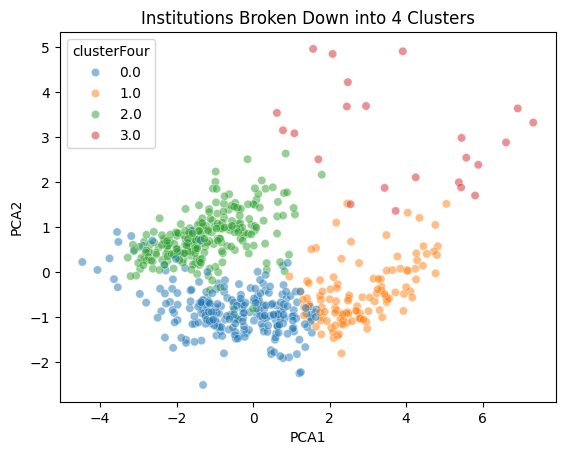

In [138]:
sns.scatterplot(data=dfXPCA,
                x='PCA1',
                y='PCA2',
                hue='clusterFour',
                palette='tab10',
                alpha=0.5)

plt.title("Institutions Broken Down into 4 Clusters")

plt.show()

From the plot we can see that Cluster 0, 1, and 2, are quite concentrated, while Cluster 3 is scattered. The clusters are not greatly overlapping each other. 

In [139]:
dfClusterFour = pd.DataFrame(clusterFour, columns=['clusterFour'])
dfClusterFour

,clusterFour
0,2
1,2
2,0
3,0
4,2
...,...
618,0
619,0
620,0
621,2


In [140]:
dfModelLabel = dfModel.join(dfClusterFour, how='right')
dfModelLabel

,rank,name,state_name,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,diversity_index,type,degree_length,in_state_tuition,out_of_state_tuition,clusterFour
0,1.0,Auburn University,Alabama,54400.0,104500.0,51.0,31.0,0.342587,Public,4 Year,11276.0,30524.0,2
1,4.0,Tuskegee University,Alabama,54500.0,93500.0,61.0,30.0,0.387688,Private,4 Year,22170.0,22170.0,2
2,5.0,Samford University,Alabama,48400.0,90500.0,52.0,3.0,0.331164,Private,4 Year,31650.0,31650.0,0
3,6.0,Spring Hill College,Alabama,46600.0,89100.0,53.0,12.0,0.497331,Private,4 Year,39464.0,39464.0,0
4,8.0,University of Alabama at Birmingham,Alabama,48600.0,87200.0,57.0,17.0,0.549084,Public,4 Year,10710.0,24630.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,9.0,Marshall University,West-Virginia,45000.0,79700.0,50.0,12.0,0.323957,Public,4 Year,8128.0,18614.0,0
619,10.0,West Liberty University,West-Virginia,42500.0,77000.0,51.0,6.0,0.222014,Public,4 Year,7730.0,15670.0,0
620,12.0,West Virginia State University,West-Virginia,41800.0,76000.0,46.0,8.0,0.598004,Public,4 Year,8167.0,16072.0,0
621,14.0,Fairmont State University,West-Virginia,42900.0,74100.0,53.0,7.0,0.255057,Public,4 Year,7514.0,16324.0,2


In [141]:
dfClusterFour = dfModelLabel.select_dtypes(include='number').groupby(
    'clusterFour').mean()
dfClusterFour.drop(columns=['rank'], inplace=True)
dfClusterFour = dfClusterFour.round({'early_career_pay': 0,
                                     'mid_career_pay': 0,
                                     'stem_percent': 2,
                                     'make_world_better_percent': 2,
                                     'diversity_index': 2,
                                     'in_state_tuition': 0,
                                     'out_of_state_tuition': 0})
dfClusterFour


,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,diversity_index,in_state_tuition,out_of_state_tuition
clusterFour,,,,,,,
0,50272.0,91017.0,53.58,17.13,0.49,26799.0,31152.0
1,55386.0,100308.0,53.95,18.61,0.57,31895.0,35707.0
2,49812.0,90000.0,53.56,16.01,0.48,24765.0,29476.0
3,51850.0,93764.0,49.50,17.36,0.58,26206.0,31811.0


From the summary table above, Cluster 2 have the lowest potential salary, STEM percentage, diversity index, and tuition, while Cluster 1 has the highest of the same data. Cluster 0 and 3 have similar potential pay and tuition, with Cluster 0 having higher "make the world a better place" percentage, but lower stem percentage and diversity index.

In [142]:
numClusters = range(2, 15)

for num in numClusters:
    kMeansLabels = KMeans(n_clusters=num, 
                          random_state=random_state, 
                          n_init='auto').fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, kMeansLabels)
    print("For number of cluster =", num,
          "The average silhouette_score is :", silhouette_avg)

For number of cluster = 2 The average silhouette_score is : 0.41131934269342313
For number of cluster = 3 The average silhouette_score is : 0.32476487748310284
For number of cluster = 4 The average silhouette_score is : 0.3348268511068025
For number of cluster = 5 The average silhouette_score is : 0.31984909345510243
For number of cluster = 6 The average silhouette_score is : 0.29686437942960514
For number of cluster = 7 The average silhouette_score is : 0.3148200014039281
For number of cluster = 8 The average silhouette_score is : 0.3061476691998504
For number of cluster = 9 The average silhouette_score is : 0.31213685951783954
For number of cluster = 10 The average silhouette_score is : 0.3194292371030443
For number of cluster = 11 The average silhouette_score is : 0.2834061803510699
For number of cluster = 12 The average silhouette_score is : 0.2699035317490487
For number of cluster = 13 The average silhouette_score is : 0.26540866329058155
For number of cluster = 14 The average sil

From the silhouette score we can see that the 2-cluster k-means clustering has the highest score and is therefore the optimal number of clusters.

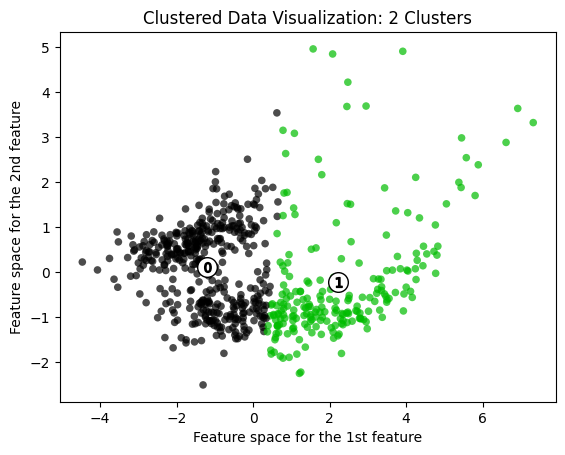

In [143]:
n_clusters = 2
label_points = False
kMeansClusterer = KMeans(n_clusters=n_clusters, 
                         random_state=random_state, 
                         n_init='auto')
kMeansLabels = kMeansClusterer.fit_predict(X_pca)
# Plot the actual clusters formed
colors = cm.nipy_spectral(kMeansLabels.astype(float) / n_clusters)
plt.scatter(X_pca[:, 0], X_pca[:, 1], 
            marker='o', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

if label_points:
    for i,v in enumerate(X_pca):
        plt.text(v[0],v[1],y.iloc[i][0],alpha=0.4)


# Labeling the clusters
centers = kMeansClusterer.cluster_centers_
#print(centers)
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

plt.title("Clustered Data Visualization: %d Clusters" % n_clusters)
plt.xlabel("Feature space for the 1st feature")
plt.ylabel("Feature space for the 2nd feature")

plt.show()

From the graph we can see the 2-cluster clustering yields two well defined clusters with their members not encroaching the area of the other cluster.

In [144]:
dfModelLabel = pd.concat([dfModelLabel,
                          pd.DataFrame(kMeansLabels, columns=['kClusterTwo'])],
                          axis=1)

In [145]:
dfClusterTwo = dfModelLabel.select_dtypes(include='number').groupby(
    'kClusterTwo').mean()
dfClusterTwo.drop(columns=['rank', 'clusterFour'], inplace=True)
dfClusterTwo = dfClusterTwo.round({'early_career_pay': 0,
                                   'mid_career_pay': 0,
                                   'stem_percent': 2,
                                   'make_world_better_percent': 2,
                                   'diversity_index': 2,
                                   'in_state_tuition': 0,
                                   'out_of_state_tuition': 0})
dfClusterTwo

,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,diversity_index,in_state_tuition,out_of_state_tuition
kClusterTwo,,,,,,,
0,49828.0,90212.0,53.73,16.66,0.48,25497.0,29980.0
1,53468.0,96603.0,53.05,17.56,0.55,29581.0,33943.0


From the summary table we can see Cluster 0 has lower salary, tuition, STEM percentage, and diversity index, but a higher "make the world a better place" percentage.